<a href="https://colab.research.google.com/github/riyapatelrp/Zomato-Restaurant-Clustering-/blob/main/Zomato_Restaurant_Clustering_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering & Sentiment Analysis



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Marathe
##### **Team Member 2 -** Riya Patel


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

The Zomato Restaurant Clustering and Sentiment Analysis Project is a machine learning project that involves clustering restaurants based on their features and performing sentiment analysis on customer reviews. The project uses unsupervised learning techniques to group similar restaurants and identifies patterns and similarities among them. Additionally, sentiment analysis is performed on the reviews of each restaurant to classify them as positive, negative, or neutral. The insights gained from this project can be useful for restaurant owners to understand customer preferences and improve their services accordingly.


# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp

# **Problem Statement**


**The restaurant industry is highly competitive and dynamic, with new restaurants constantly entering the market. Restaurant owners face the challenge of understanding customer preferences and meeting their expectations to stay relevant in the market. In this context, there is a need for a data-driven approach that can help restaurant owners gain insights into customer preferences and improve their services accordingly. The Zomato Restaurant Clustering and Sentiment Analysis Project aims to address this problem by leveraging machine learning techniques to cluster restaurants based on their features and perform sentiment analysis on customer reviews to identify areas of improvement.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# For Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud

# For Text Preprocessing 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# For removing StopWords
from nltk.corpus import stopwords

!pip install contractions
import contractions

# For Tokenization
from nltk.tokenize import word_tokenize

# For Text Normalisation
nltk.download('averaged_perceptron_tagger')
# Stemming
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
# lemmatization 
from nltk.stem import WordNetLemmatizer

# For Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# For data scaling 
from sklearn.preprocessing import StandardScaler


#importing shap for model explainability
!pip install shap
import shap 

import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [2]:
# Load Dataset
# Reading Zomato Restaurant names and Metadata.csv file
url = 'https://drive.google.com/file/d/1m4lylf_iAyxlsIW1uTGrMSuhHYwuntJl/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
restaurant_df = pd.read_csv(url)

In [3]:
# Reading Zomato Restaurant reviews.csv file
url2 = 'https://drive.google.com/file/d/1JG_8OGZ6tS-0SOstH_x3n9sN0ZI1AFNC/view?usp=sharing'
url2 = 'https://drive.google.com/uc?id=' + url2.split('/')[-2]
reviews_df = pd.read_csv(url2)

### Dataset First View

In [4]:
# Dataset First Look 
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
restaurant_df.shape

(105, 6)

In [7]:
reviews_df.shape

(10000, 7)

### Dataset Information

In [8]:
# Dataset Info
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(restaurant_df[restaurant_df.duplicated()])

0

In [11]:
len(reviews_df[reviews_df.duplicated()])

36

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [13]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

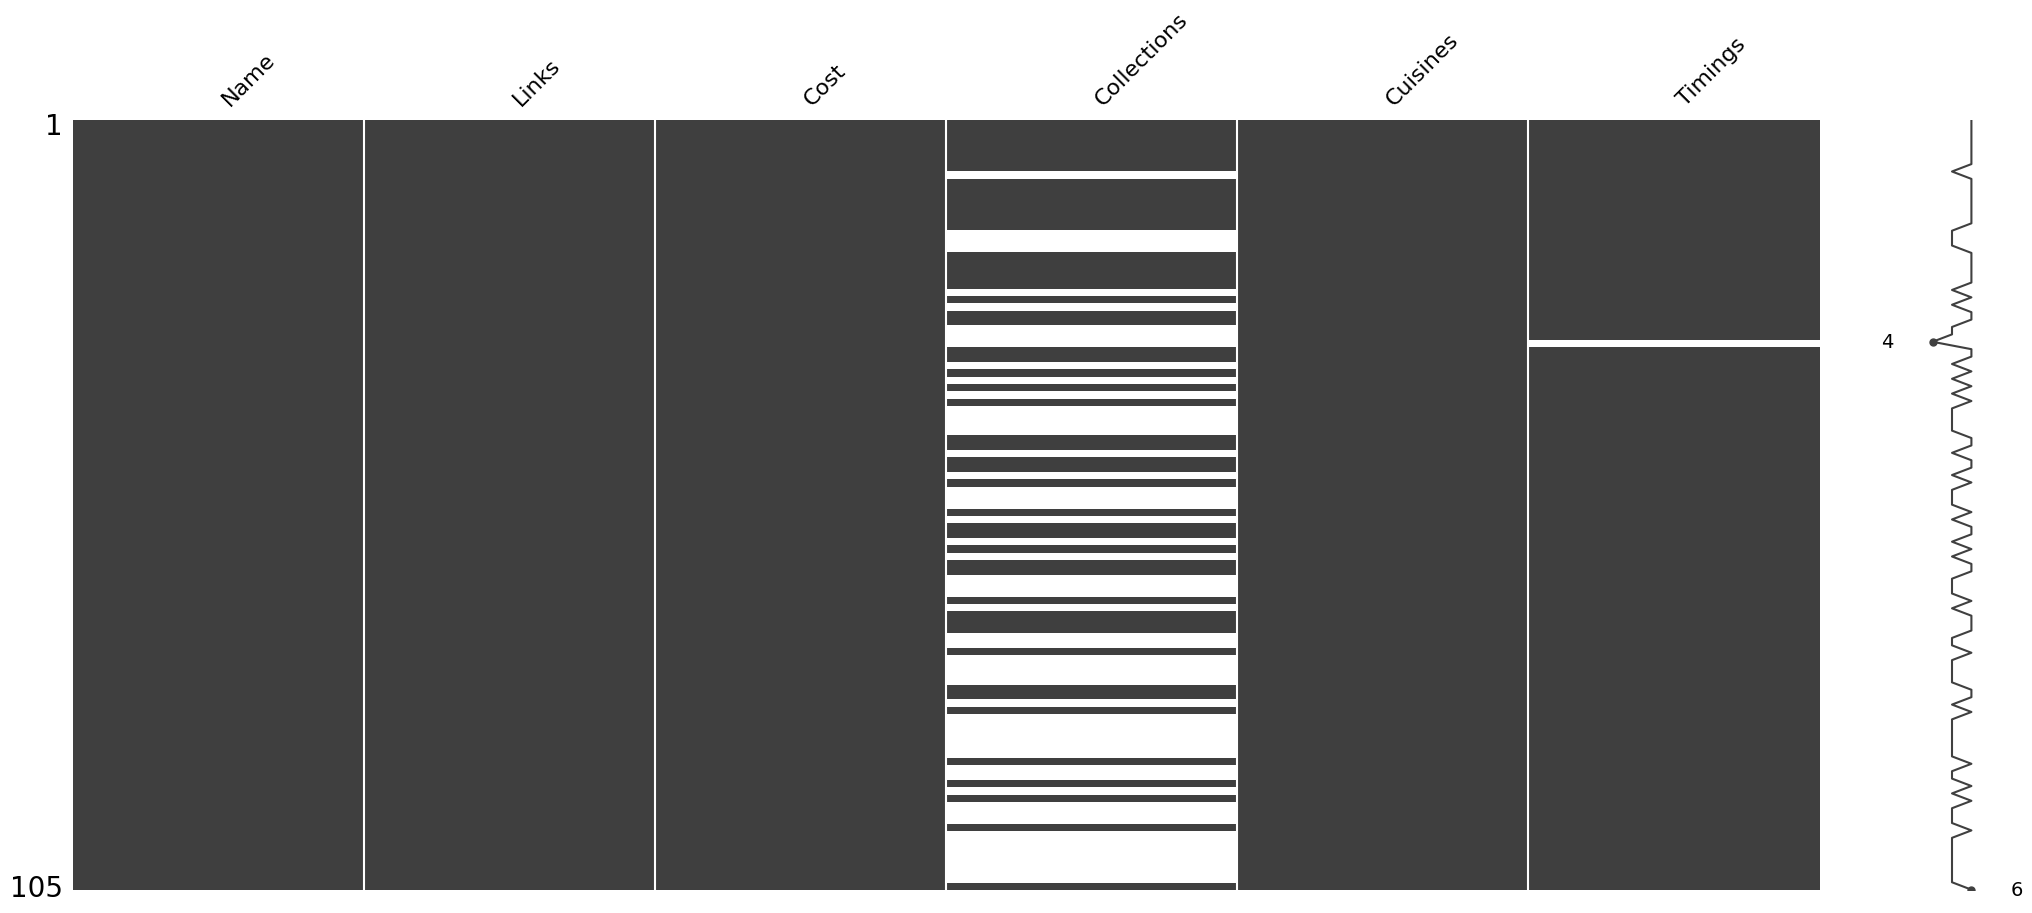

In [14]:
# Visualizing the missing values
import missingno as msno
# visualize the null values in the DataFrame 1
msno.matrix(restaurant_df)
plt.show()

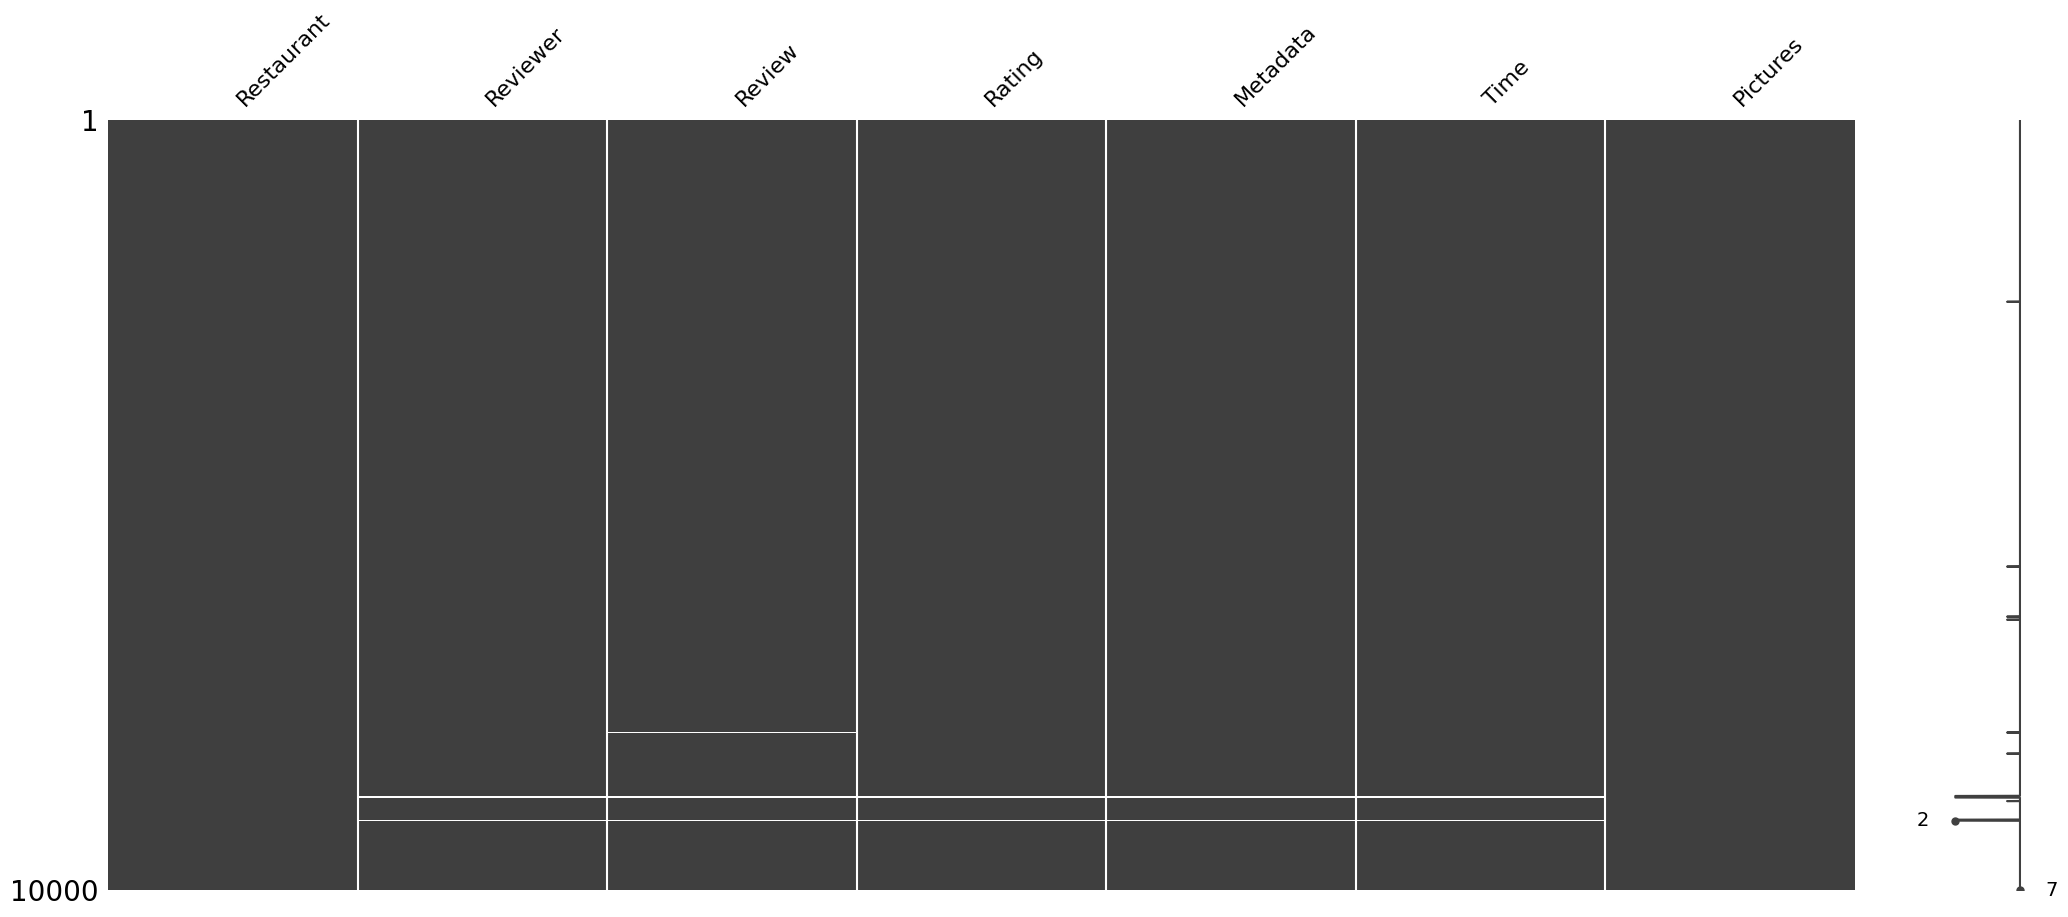

In [15]:
# visualize the null values in the DataFrame 2
msno.matrix(reviews_df)
plt.show()

### What did you know about your dataset?

We have two datasets in our project - "Zomato Restaurant names and Metadata.csv" and "Zomato Restaurant reviews.csv".

The "Zomato Restaurant names and Metadata.csv" dataset contains six columns: "Name", "Links", "Cost", "Collections", "Cuisines", and "Timings". There are 105 non-null values in each column except for "Collections" and "Timings", which have 51 and 104 non-null values, respectively.

The "Zomato Restaurant reviews.csv" dataset contains seven columns: "Restaurant", "Reviewer", "Review", "Rating", "Metadata", "Time", and "Pictures". There are 10,000 non-null values in the "Restaurant" and "Pictures" columns, while the "Reviewer", "Review", "Rating", "Metadata", and "Time" columns have 9962 non-null values.

Overall, these datasets contain valuable information about restaurants such as their names, cuisines, cost, and customer reviews. The information can be used to perform various analysis tasks such as sentiment analysis and clustering to gain insights into customer preferences and improve restaurant services.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
restaurant_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [17]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [18]:
# Dataset Describe
restaurant_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [19]:
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

**Variable Description**



---


**Restaurant Data**

---




|**Fields** | **Description**|
|-----------|--------------|
Name | Name of Restaurants
Links | URL Links of Restaurants
Cost | Per person estimated cost of dining
Collections |Tagging of Restaurants with respect to Zomato categories
Cuisines|Cuisines served by restaurants
Timings|Restaurant timings



---


**Review Data**


---


|**Fields** | **Description**|
|-----------|--------------|
Reviewer|Name of the reviewer
review|Review text
Rating|Rating provided
MetaData|Reviewer metadats-No of reviews and followers
Time|Date and Time of Review
Pictures| Number of pictures posted with review


### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [21]:
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Data Wrangling on Zomato Restaurant Names and Metadata

In [22]:
# Write your code to make your dataset analysis ready.
def convert_column_to_int64(df, column_name):
    """
    Convert a column in a pandas DataFrame from object to int64 data type,
    while handling values with commas as thousands separators.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be converted.
    column_name (str): The name of the column to be converted.

    Returns:
    None
    """

    # Remove commas from the column values
    df[column_name] = df[column_name].str.replace(',', '')

    # Convert the column to int64 data type
    df[column_name] = df[column_name].astype('int64')

In [23]:
# Applying Above Function in 'Cost' col of Restaurant dataset
convert_column_to_int64(restaurant_df, 'Cost')

In [24]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [25]:
# Define a function to count the number of words in a string separated by commas
def count_words(string):
    words = string.split(',')
    return len(words)

In [26]:
# Apply the 'count_words' function to the 'Cuisines' column of the DataFrame and store the result in a new 'cuisine_count' column
restaurant_df['cuisine_count'] = restaurant_df['Cuisines'].apply(count_words)

In [27]:
restaurant_df['cuisine_count'].value_counts()

3    33
2    26
4    21
5    12
1    12
6     1
Name: cuisine_count, dtype: int64

* 33 restaurants with 3 different cusine
* 26 restaurants with 2 different cusine
* 21 restaurants with 4 different cusine
* 12 restaurants with 5 different cusine
* 12 restaurants with only 1 cusine
* only 1 restaurant with 6 different cusine

In [28]:
# Extract the unique values of 'Cuisines' column by splitting the strings using the comma separator
cuisines = set()
for cuisine_string in restaurant_df['Cuisines']:
    cuisine_list = cuisine_string.split(', ')
    cuisines.update(cuisine_list)
cuisines

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [29]:
len(cuisines)

44

There are 44 different Cuisines present in our dataset.

In [30]:
# Finding no of restaurnts by latest cuisines
cuisine_list = restaurant_df['Cuisines'].str.split(', ')

# storing all the cusines in cuisine_dict 
cuisine_dict = {}

for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if cuisine in cuisine_dict:
            cuisine_dict[cuisine] += 1
        else:  
            cuisine_dict[cuisine] = 1 

In [31]:
# convert it to dataframe and getting all Cuisine by transposing the rows in dictionary to columns
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine', 0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending=False)
cuisine_df

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


From the above dataframe, we can see that North Indian is the mostly available food on 61 number of different restaurants followed by Chinese and Continental food which is available on 43 and 21 restaurants. It means mostly people demands for this food as compared to other food like pizza, juices, malaysian food which is available on less number of restaurant.

In [32]:
# Restaurant with maximum number of cuisine
pd.set_option('display.max_colwidth', None)

topRestarant = restaurant_df.loc[restaurant_df.groupby('Name')['cuisine_count'].idxmax()]
topRestarant_sorted = topRestarant.sort_values(by=['cuisine_count'], ascending=False)[:20]
topRestarant_sorted[['Name','cuisine_count','Cuisines']]

,Name,cuisine_count,Cuisines
0,Beyond Flavours,6,"Chinese, Continental, Kebab, European, South Indian, North Indian"
3,Shah Ghouse Hotel & Restaurant,5,"Biryani, North Indian, Chinese, Seafood, Beverages"
70,Urban Asia - Kitchen & Bar,5,"Asian, Thai, Chinese, Sushi, Momos"
21,Jonathan's Kitchen - Holiday Inn Express & Suites,5,"North Indian, Japanese, Italian, Salad, Sushi"
92,Collage - Hyatt Hyderabad Gachibowli,5,"Continental, Italian, North Indian, Chinese, Asian"
82,Al Saba Restaurant,5,"North Indian, Chinese, Seafood, Biryani, Hyderabadi"
8,Hyper Local,5,"American, Chinese, North Indian, Kebab, South Indian"
26,Mustang Terrace Lounge,5,"Mexican, Italian, North Indian, Chinese, Salad"
31,Pista House,5,"Bakery, North Indian, Mughlai, Juices, Chinese"
4,Over The Moon Brew Company,5,"Asian, Continental, North Indian, Chinese, Mediterranean"


* Beyond Flavours restaurant has a maximum number of different type of cuisine followed by Shah Ghouse Hotel & Restaurant.
* Republic Of Noodles - Lemon Tree Hotel has 4 types of cuisine available.

In [33]:
# Number of Indian Restaurants with Indian cuisine
indian_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Indian')]
indian_restaurant.shape[0]

63

In [34]:
# Number of Chinese Restaurants with Chinese cuisine
Chinese_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Chinese')]
Chinese_restaurant.shape[0]

43

* There are 63 Restaurants where Indian cuisine is available
* There are 43 Restaurants where Chinese cuisine is available


In [35]:
pd.set_option('display.max_rows', None)

# Group the DataFrame by Cuisine and sum the total cost for each group
total_cost_by_cuisine = restaurant_df.groupby('Cuisines')['Cost'].sum()
total_cost_by_cuisine.sort_values(ascending=False)

Cuisines
North Indian, Chinese, Continental                                   3300
Continental, Italian, North Indian, Chinese, Asian                   2800
Continental                                                          2600
Modern Indian, Asian, Continental, Italian                           2500
North Indian, Chinese                                                2050
North Indian, Japanese, Italian, Salad, Sushi                        1900
North Indian, Italian, Continental, Asian                            1800
Asian, Sushi                                                         1750
Thai, Asian, Chinese, Malaysian                                      1700
Italian, North Indian, South Indian, Asian                           1700
Mediterranean, North Indian, Kebab, BBQ                              1600
American                                                             1600
North Indian, Chinese, Japanese, Sushi                               1500
European, Mediterranean, Nort

In [36]:
# Top 20 most expensive restaurants where average per person estimated cost of dining is high
top_20_expensive_restaurants = restaurant_df.sort_values('Cost', ascending=False).head(20)
top_20_expensive_restaurants[['Name','Cost']]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


Collage - Hyatt Hyderabad Gachibowli and Feast - Sheraton Hyderabad Hotel are the two most expensive restaurants with the cost of 2800 and 2500 ruppees which is a average per person estimated cost of dining.

In [37]:
# Top 20 most affordable restaurants where average per person estimated cost of dining is low
top_20_affordable_restaurants = restaurant_df.sort_values('Cost').head(20)
top_20_affordable_restaurants[['Name','Cost']]

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


Mohammedia Shawarma, Amul and Asian Meal Box Hotel are the most affordable Restaurants where the cost of 150 and 200 ruppees which is a average per person estimated cost of dining.

#### Data Wrangling on Zomato Restaurant Reviews Dataset

In [38]:
# convert the 'Time' column from object to datetime data type
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], format='%m/%d/%Y %H:%M')
reviews_df['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
9962 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [39]:
# Total count of ratings from 1 star to 5 star
ratings_df = reviews_df['Rating'].value_counts().reset_index()
ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
ratings_df

,Ratings(1-5),Count
0,5,3832
1,4,2373
2,1,1735
3,3,1193
4,2,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9
9,Like,1


In [40]:
# drop the rows where 'Rating' is not equal to 'Like'
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [41]:
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

* 5 star is the ratings given by 3832 number of customer.
* Lowest rating given by the customers is 1.5 star.

In [42]:
# rename the 'Reviewer' column to 'Customer_Name'
reviews_df = reviews_df.rename(columns={'Reviewer': 'Customer_Name'})

In [43]:
reviews_df.head()

,Restaurant,Customer_Name,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [44]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9961 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 624.9+ KB


In [45]:
# Total number of customers
reviewers = reviews_df['Customer_Name'].value_counts().reset_index()
reviewers.rename(columns={'index': 'Customer Name'}, inplace=True)
reviewers.rename(columns={'Customer_Name': 'Count'}, inplace=True)
reviewers[:20]

,Customer Name,Count
0,Ankita,13
1,Parijat Ray,13
2,Kiran,12
3,Jay Mehta,11
4,Vedant Killa,11
5,Sravani,10
6,Siva Kumar,10
7,Priyanka,10
8,Age Of Foodies (Suraj Karambe),10
9,Manojkumar D Nambisan,10


In [46]:
# extract Review_count and Followers from Metadata
reviews_df['Review_count'] = reviews_df['Metadata'].str.extract('(\d+) Review')
reviews_df['Followers'] = reviews_df['Metadata'].str.extract('(\d+) Follower')

In [47]:
# fill missing values with 0 in 'Review_count' column and 'Followers' column
reviews_df['Review_count'] = pd.to_numeric(reviews_df['Review_count']).fillna(0).astype(int)
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers']).fillna(0).astype(int)

In [48]:
# Dropping unnecessary column as it is not needed now
reviews_df = reviews_df.drop(columns=['Metadata'])
reviews_df.isnull().sum()

Restaurant        0
Customer_Name    38
Review           45
Rating           38
Time             38
Pictures          0
Review_count      0
Followers         0
dtype: int64

In [49]:
# Top 20 Popular customers (With Highest number of followers) and their order timings
popular_customers = reviews_df.loc[reviews_df.groupby('Customer_Name')['Followers'].idxmax()]
popular_customers_sorted = popular_customers.sort_values(by=['Followers'], ascending=False)[:20]
popular_customers_sorted[['Customer_Name','Followers', 'Restaurant','Time']]

,Customer_Name,Followers,Restaurant,Time
3927,Satwinder Singh,13410,Deli 9 Bistro,2019-02-10 12:46:00
8719,Eat_vth_me,13320,American Wild Wings,2019-05-13 15:32:00
3147,Samar Sardar,11329,Pista House,2018-10-12 20:21:00
7884,Foodies Hyderabad,9494,Khaan Saab,2019-02-01 18:04:00
1177,Srinivas,7628,Barbeque Nation,2018-07-14 13:10:00
1071,Aman Arora,7589,Sardarji's Chaats & More,2018-10-31 22:33:00
635,ASH&B2,6931,eat.fit,2019-04-07 22:27:00
5581,Hasanthi Mula,5879,Cafe Eclat,2018-06-10 14:05:00
9701,#FOODPORN,5873,Zega - Sheraton Hyderabad Hotel,2019-05-15 16:35:00
4820,FooD HUNTer,5715,Udipi's Upahar,2018-10-01 09:28:00


In [50]:
# Top 20 Popular customers (With Highest number of Review_count)
popular_customersR = reviews_df.loc[reviews_df.groupby('Customer_Name')['Review_count'].idxmax()]
popular_customersR_sorted = popular_customersR.sort_values(by=['Review_count'], ascending=False)[:20]
popular_customersR_sorted[['Customer_Name','Review_count']]

,Customer_Name,Review_count
3124,Anvesh Chowdary,1031
4512,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685
7638,Abc098,665
6627,Mithun Ravindranathan,560
9653,Mohd Zubair Ali (Hyderabad.Food.Diaries),482
9999,Bhargava Krishna,472
5889,Epicurean Tales,452
755,Raghu,443
9179,Aarti Kamath,417
9181,Shrishail Deshnur,414


In [51]:
# Top 20 Popular Restaurant (With Highest number of Review_count)
popular_restaurant = reviews_df.loc[reviews_df.groupby('Restaurant')['Review_count'].idxmax()]
popular_restaurant_sorted = popular_restaurant.sort_values(by=['Review_count'], ascending=False)[:20]
popular_restaurant_sorted[['Restaurant','Review_count']]

,Restaurant,Review_count
9208,Collage - Hyatt Hyderabad Gachibowli,1031
3124,Pista House,1031
7297,Labonel,1031
4512,Owm Nom Nom,685
7638,The Old Madras Baking Company,665
6627,Aromas@11SIX,560
9653,Hyderabadi Daawat,482
9999,Chinese Pavilion,472
5889,Tempteys,452
9168,Cascade - Radisson Hyderabad Hitec City,452


In [52]:
# Top 20 Popular Restaurant (With Highest number of followers)
popular_restaurant_by_followers = reviews_df.loc[reviews_df.groupby('Restaurant')['Followers'].idxmax()]
popular_restaurant_by_followers_sorted = popular_restaurant_by_followers.sort_values(by=['Followers'], ascending=False)[:20]
popular_restaurant_by_followers_sorted[['Restaurant','Followers']]

,Restaurant,Followers
6592,Komatose - Holiday Inn Express & Suites,13410
3927,Deli 9 Bistro,13410
6876,The Tilt Bar Republic,13410
8719,American Wild Wings,13320
5160,Hitech Bawarchi Food Zone,11329
3147,Pista House,11329
8027,Tandoori Food Works,9494
9659,Hyderabadi Daawat,9494
9518,Desi Bytes,9494
7884,Khaan Saab,9494


In [53]:
# Peak hours for orders
def get_number_of_orders(a,b):
  A = (reviews_df['Time'].dt.hour >= a) & (reviews_df['Time'].dt.hour < b)
  peak_A = reviews_df[A]
  row_count = peak_A.shape[0]
  print(f'Number of Orders on Zomato between {a} and {b} is :{row_count}')

In [54]:
atime=list(np.arange(25))
btime=list(np.arange(1,25))
for a,b in zip(atime,btime):
  d = get_number_of_orders(a,b)

Number of Orders on Zomato between 0 and 1 is :509
Number of Orders on Zomato between 1 and 2 is :313
Number of Orders on Zomato between 2 and 3 is :167
Number of Orders on Zomato between 3 and 4 is :102
Number of Orders on Zomato between 4 and 5 is :55
Number of Orders on Zomato between 5 and 6 is :39
Number of Orders on Zomato between 6 and 7 is :44
Number of Orders on Zomato between 7 and 8 is :78
Number of Orders on Zomato between 8 and 9 is :134
Number of Orders on Zomato between 9 and 10 is :171
Number of Orders on Zomato between 10 and 11 is :229
Number of Orders on Zomato between 11 and 12 is :308
Number of Orders on Zomato between 12 and 13 is :459
Number of Orders on Zomato between 13 and 14 is :580
Number of Orders on Zomato between 14 and 15 is :776
Number of Orders on Zomato between 15 and 16 is :645
Number of Orders on Zomato between 16 and 17 is :549
Number of Orders on Zomato between 17 and 18 is :480
Number of Orders on Zomato between 18 and 19 is :438
Number of Orders

In [55]:
# Lets find Peak hours which is between 8 pm to 12 am
get_number_of_orders(20,24)

Number of Orders on Zomato between 20 and 24 is :3363


In [56]:
# Lets find Off hours which is between 4 am to 8 am
get_number_of_orders(4,8)

Number of Orders on Zomato between 4 and 8 is :216


In [57]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Time           9961 non-null   datetime64[ns]
 5   Pictures       9999 non-null   int64         
 6   Review_count   9999 non-null   int64         
 7   Followers      9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 961.1+ KB


In [58]:
hourly_counts = reviews_df['Time'].dt.hour.value_counts()
# find the busiest Hour
busiest_hour = hourly_counts.idxmax()
print(f'busiest_hour: {busiest_hour}')
print("The number of Orders in that hour is:", hourly_counts[busiest_hour])

busiest_hour: 22.0
The number of Orders in that hour is: 968


In [59]:
# count the number of orders for each date
daily_counts = reviews_df['Time'].dt.date.value_counts()

# find the busiest day
busiest_day = daily_counts.idxmax()

# print the results
print("The busiest day for Zomato is:", busiest_day)
print("The number of Orders on that day is:", daily_counts[busiest_day])


The busiest day for Zomato is: 2018-07-29
The number of Orders on that day is: 97


* The Busiest day for Zomato is **29th July 2018**
* The number of Orders on that day is **97**

In [60]:
# calculate the first and last values
first_time = reviews_df['Time'].min()
last_time = reviews_df['Time'].max()

In [61]:
# Getting date and time of the first and last order placed by customer
print(f"The first order is placed in Zomato on: {first_time}")
print(f"The last order is placed in Zomato on: {last_time}")

The first order is placed in Zomato on: 2016-05-31 16:41:00
The last order is placed in Zomato on: 2019-05-25 20:23:00


In [62]:
last_time - first_time

Timedelta('1089 days 03:42:00')

Our overall dataset containing data of 1089 Days Three Hours and 42 Minutes

In [63]:
reviews_df.shape

(9999, 8)

In [64]:
Firsto = reviews_df.loc[reviews_df.groupby('Customer_Name')['Time'].idxmax()]
Firsto.shape

(7446, 8)

In [65]:
len(set(reviews_df['Customer_Name']))

7447

There are 7447 Different Customer Who have ordered food From Zomato in this Dataset 

In [66]:
from collections import Counter
# count the occurrences of each name
name_counts = Counter(reviews_df['Customer_Name'])
# filter out the names that occur only once
once = [name for name, count in name_counts.items() if count == 1]
len(once)

6105

6105 Customers Ordered any food items only once on Zomato

In [67]:
# filter out the names that occur only once
repeat = [name for name, count in name_counts.items() if count > 1]
len(repeat)

1342

1342 Are repeat Customers on Zomato

In [68]:
mvp = [name for name, count in name_counts.items() if count > 10]
len(mvp)
mvp

['Kiran', 'Ankita', 'Parijat Ray', 'Vedant Killa', 'Jay Mehta', nan]

These are Most valuable Customers who have ordered Food From Zomato more than 10 times

In [69]:
# Top Customers Who have posted most pictures on Zomato
social_customer = reviews_df.loc[reviews_df.groupby('Customer_Name')['Pictures'].idxmax()]
social_customer_sorted = social_customer.sort_values(by=['Pictures'], ascending=False)[:20]
social_customer_sorted[['Customer_Name','Pictures']]

,Customer_Name,Pictures
9043,Anvith Devulapally,64
3148,Food Nawabs,52
6080,Akshith,42
6066,Hydfoodiesisters,37
9222,Vijaya,34
7375,ChicLifeByte,34
9621,BeingHydFoodie,32
9683,Hyderabadfoodexplorer (sanchay Gumidelli),28
6069,Vamshi Puli,28
9042,Vasanthi Singampalli,27


These are top social customers who have posted most number of pictures on Zomato

In [70]:
# creating new variable review length 
reviews_df['Review'] = reviews_df['Review'].astype(str)
reviews_df['Review_length'] = reviews_df['Review'].apply(len)
reviews_df.head(2)

,Restaurant,Customer_Name,Review,Rating,Time,Pictures,Review_count,Followers,Review_length
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0,1,2,222
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0,3,2,144


In [71]:
# creating new column named polarity for the sentiment analysis
from textblob import TextBlob
reviews_df['Polarity'] = reviews_df['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_df.head(2)

,Restaurant,Customer_Name,Review,Rating,Time,Pictures,Review_count,Followers,Review_length,Polarity
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0,1,2,222,0.660000
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0,3,2,144,0.606667


We have created new variable called polarity through which we can just determine the reviews as positive, negetive and neutral reviews.

**What is polarity score in sentiment analysis?**

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

### What all manipulations have you done and insights you found?

* There are 105 different restaurant data in restaurant CSV
* 10000 Data points in reviews csv

* 5 Rating by 3832 Number of People
* 4 Rating by 2373 Number of People
* 1 Rating by 1735 Number of People
* 3 Rating by 1193 Number of People
* 2 Rating by 684  Number of People

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Dist Plot and Hist Plot on Numerical Features (Univariate)

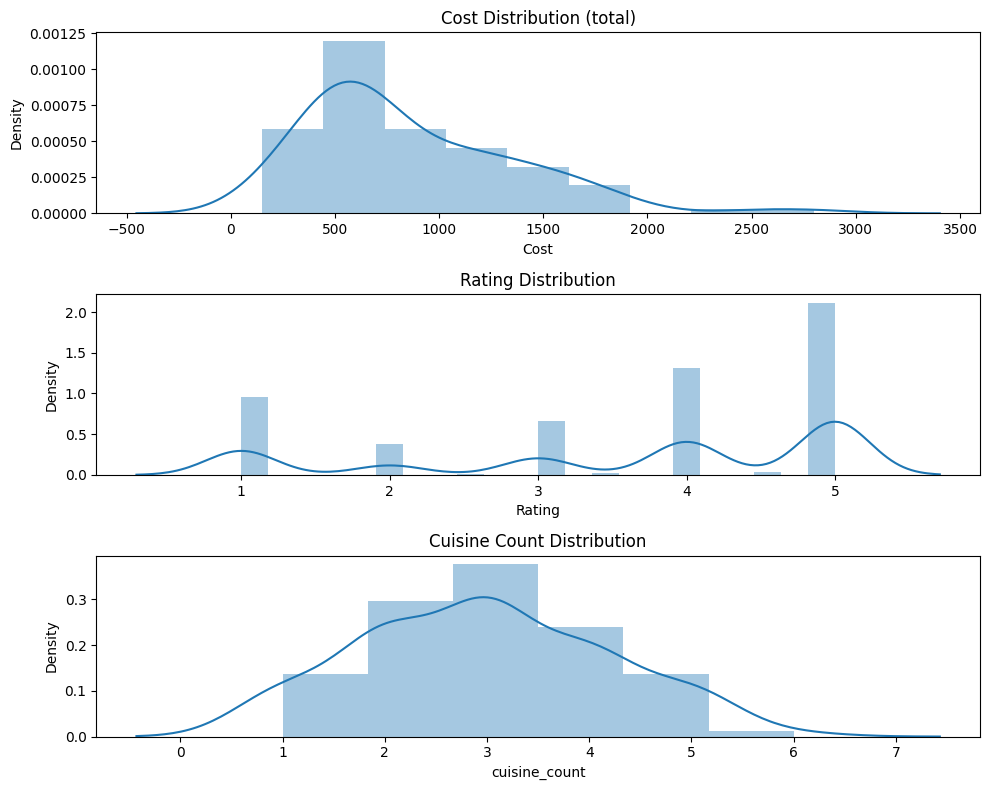

In [423]:
# Chart - 1 visualization code
# GRAPH -1
# Dist Plot of some important numerical feature 

fig, ax= plt.subplots(3,1, figsize=(10,8))

ax[0].set_title("Cost Distribution (total)")
sns.distplot(restaurant_df['Cost'], kde=True, ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.distplot(reviews_df['Rating'], kde=True, ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.distplot(restaurant_df['cuisine_count'], kde=True, ax=ax[2])

fig.tight_layout()
fig.show()
plt.show()

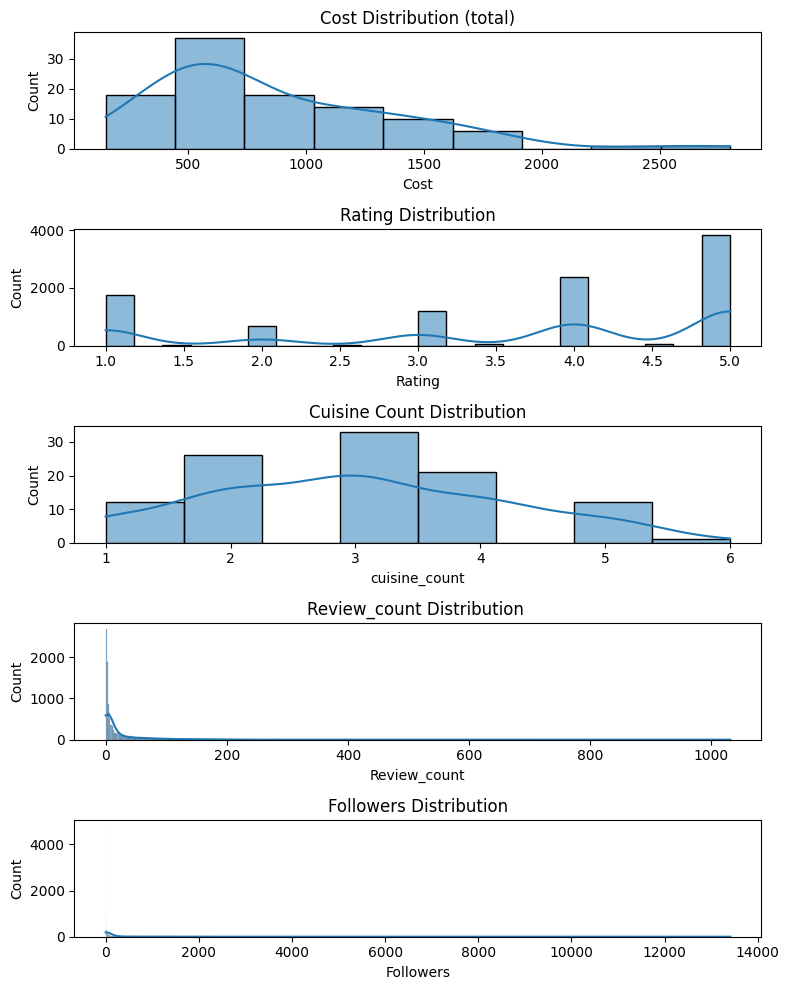

In [424]:
# GRAPH - 2
# Hist Plot of some important numerical feature 
# To see the distributions and skewness of the numerical feature

fig, ax= plt.subplots(5,1, figsize=(8,10))

ax[0].set_title("Cost Distribution (total)")
sns.histplot(restaurant_df['Cost'], kde=True, ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.histplot(reviews_df['Rating'], kde=True, ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.histplot(restaurant_df['cuisine_count'], kde=True, ax=ax[2])

ax[3].set_title("Review_count Distribution ")
sns.histplot(reviews_df['Review_count'], kde=True, ax=ax[3])

ax[4].set_title("Followers Distribution")
sns.histplot(reviews_df['Followers'], kde=True, ax=ax[4])

fig.tight_layout()
fig.show()
plt.show()

##### 1. Why did you pick the specific chart?

**Dist Plot** is known as distribution plot which depicts the variations in data that is it will show the variations in distribution of observations. It also displays a combination of statistical representations of numerical data, such as histogram, kde, bars etc. Distplot is helpful in understanding the distribution of the feature.

**Hist Plot** is a graphical representation of data that organizes the data into bins, and shows how frequently each bin occurs. It is used to illustrate the distribution of data, as well as its skewness.



##### 2. What is/are the insight(s) found from the chart?

Insights:
* Cost column shows skewness.
* Maximum restaurant has a price range of 500 rupee.
* Most of the restaurants got 5 star ratings.
* Most of the restaurants has 3 types of cuisines.
* Most of customers posts 1 or 2 pictures with their reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cost is the important factor for any business. But from this visualisation, we are not getting any insights. we will do further analysis.

#### Chart - 2 Pie Plot on Ratings & Cuisine Count Features (Univariate)

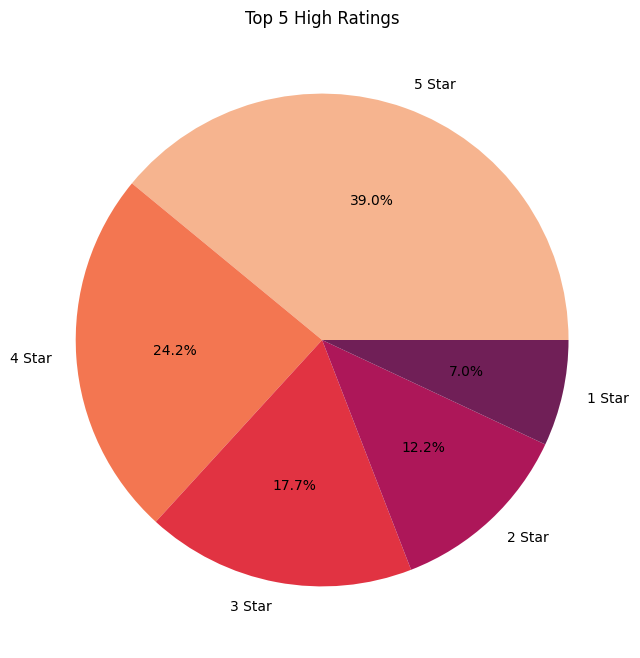

In [425]:
# Chart - 2 visualization code
# GRAPH - 2
# Pie Plot of Total count of ratings from 1 star to 5 star

# ratings_df = reviews_df['Rating'].value_counts().reset_index()
# ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
# ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
# ratings_df

plt.figure(figsize=(15,8))
x_label = reviews_df['Rating'].value_counts().index
y_label = reviews_df['Rating'].value_counts().values
palette_color = sns.color_palette('rocket_r')
keys = [ '5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
plt.pie(x = y_label[:5], labels = keys, autopct='%1.1f%%', colors=palette_color)
plt.title('Top 5 High Ratings', color= 'black')
plt.show()

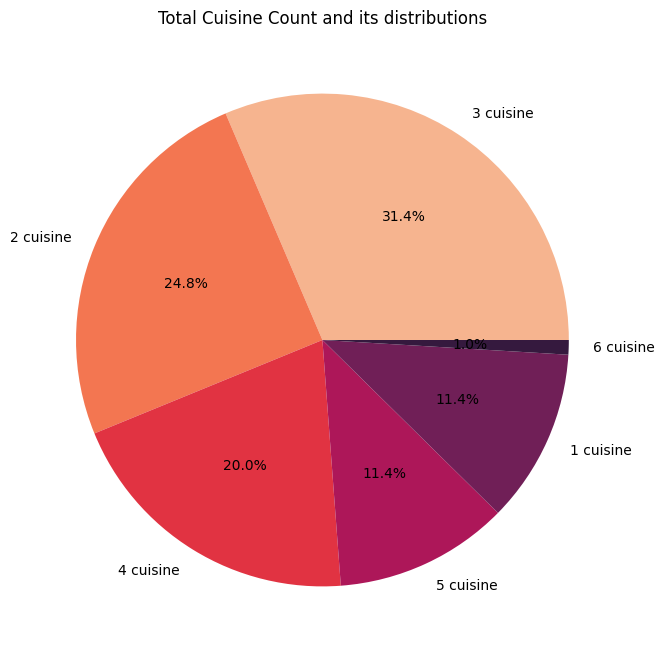

In [426]:
# GRAPH - 3
# Pie Plot of Total cuisine count & its distribution

x_label = restaurant_df['cuisine_count'].value_counts().index
y_label = restaurant_df['cuisine_count'].value_counts().values

plt.figure(figsize=(8,8))
palette_color = sns.color_palette('rocket_r')
keys = ['3 cuisine', '2 cuisine', '4 cuisine', '5 cuisine', '1 cuisine', '6 cuisine']
plt.pie(x = y_label, labels = keys, autopct='%1.1f%%', colors=palette_color)
plt.title('Total Cuisine Count and its distributions', color= 'black')
plt.show()

##### 1. Why did you pick the specific chart?

The main purpose of using pie chart is to indicates a part-to-whole relationship in our data. The portions of the graph are proportional to the fraction of the total in each and every category. The complete "pie" represents a hundred proportion of a whole, while at the same time, the pie "slices" signify portions of the whole. It shows the total coverages covered by room types, neighbourhood group & neighbourhood.

##### 2. What is/are the insight(s) found from the chart?

INSIGHTS:
* From graph 1 it ia clear that most of the restaurant has 4 and 5 star of the rating which distribution is of 39% and 24.2%. 
* Restaurant with 1 star is only 7% rating.
* From the graph 2, we can say that restaurants with 3 and 2 types of different cuisines has more number i.e. 32.1% and 24.1% distribution.
* While restaurant with 6 cuisine type has less number with 1% only. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We found that less number of different types of available cuisines may affect the restaurant's image as customers looks firstly about the different type of food as per their preference.

#### Chart - 3 Wordclouds on Reviews Feature (Univariate)

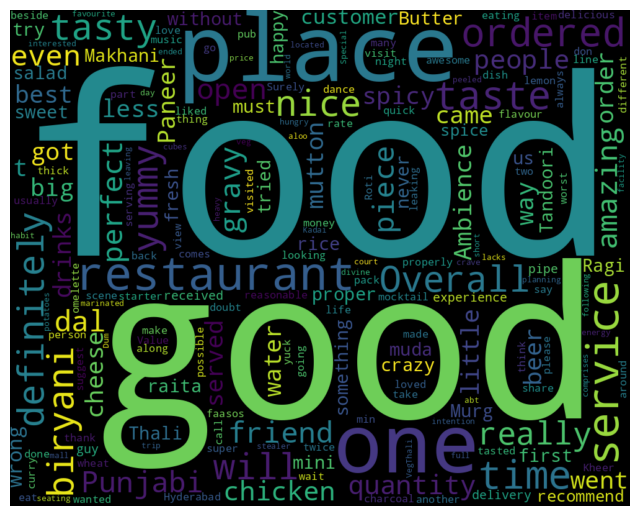

In [427]:
# Chart - 3 visualization code
# GRAPH - 1
# Creating word cloud for reviews

plt.figure(figsize=(8,8))
text = " ".join(name for name in reviews_df.sort_values('Review',ascending=False).Review[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [428]:
# Extracting positive and negetive reviews 
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'],errors='coerce')

# Positive review is where ratings is greater than & equal to 3 star
pos_reviews = reviews_df[reviews_df.Rating >= 3]

# Negetive review is where ratings is less than the 3 star
neg_reviews = reviews_df[reviews_df.Rating < 3]

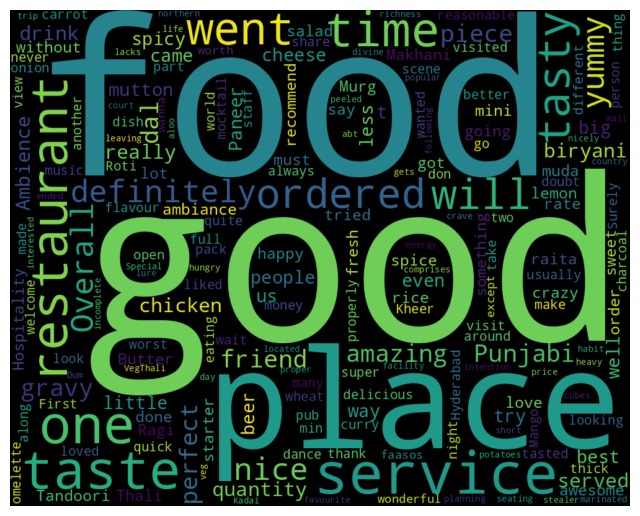

In [429]:
# Wordcloud for Positive Reviews

plt.figure(figsize=(8,8))

long_string = " ".join(name for name in pos_reviews.sort_values('Review',ascending=False).Review[:30])
long_string

wordcloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'black')
wordcloud.generate(long_string)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

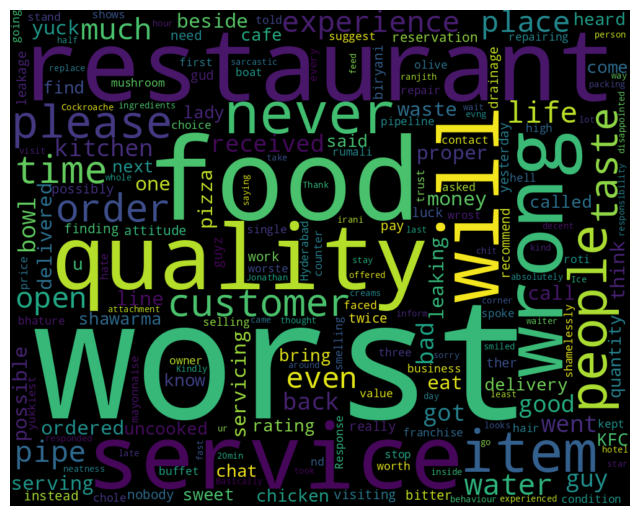

In [430]:
# Wordcloud for Negetive Reviews

plt.figure(figsize=(8,8))

long_string = " ".join(name for name in neg_reviews.sort_values('Review',ascending=False).Review[:30])
long_string

wordcloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'black')
wordcloud.generate(long_string)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

##### 1. Why did you pick the specific chart?

We have used wordcloud which is a visual representation of the unstructured text as a images in which bigger is the word, more often that word is mentioned which is helpful in getting insights of trending patterns.

##### 2. What is/are the insight(s) found from the chart?

We have created two datasets equal and above 3 rating for positive reviews and below 3 for negative reviews. Apart from stopwords i have removing common words used in restuarant business.

From the above visualization, we can definately come up with some conclusion that most of the customers gave positive as well as negetive feedback using this keywords. So that we can easily examine that what exactly the behaviour and views of our customers.

Service , bad chicken , quality, uncooked food are key reasons for negative reviews

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The gained insights help us creating a positive buisness impact by using reviews and ratings so that restaurant with less number of ratings can work on their management.

#### Chart - 4 Bar Plot on Numerical + Categorical Features (Bivariate)

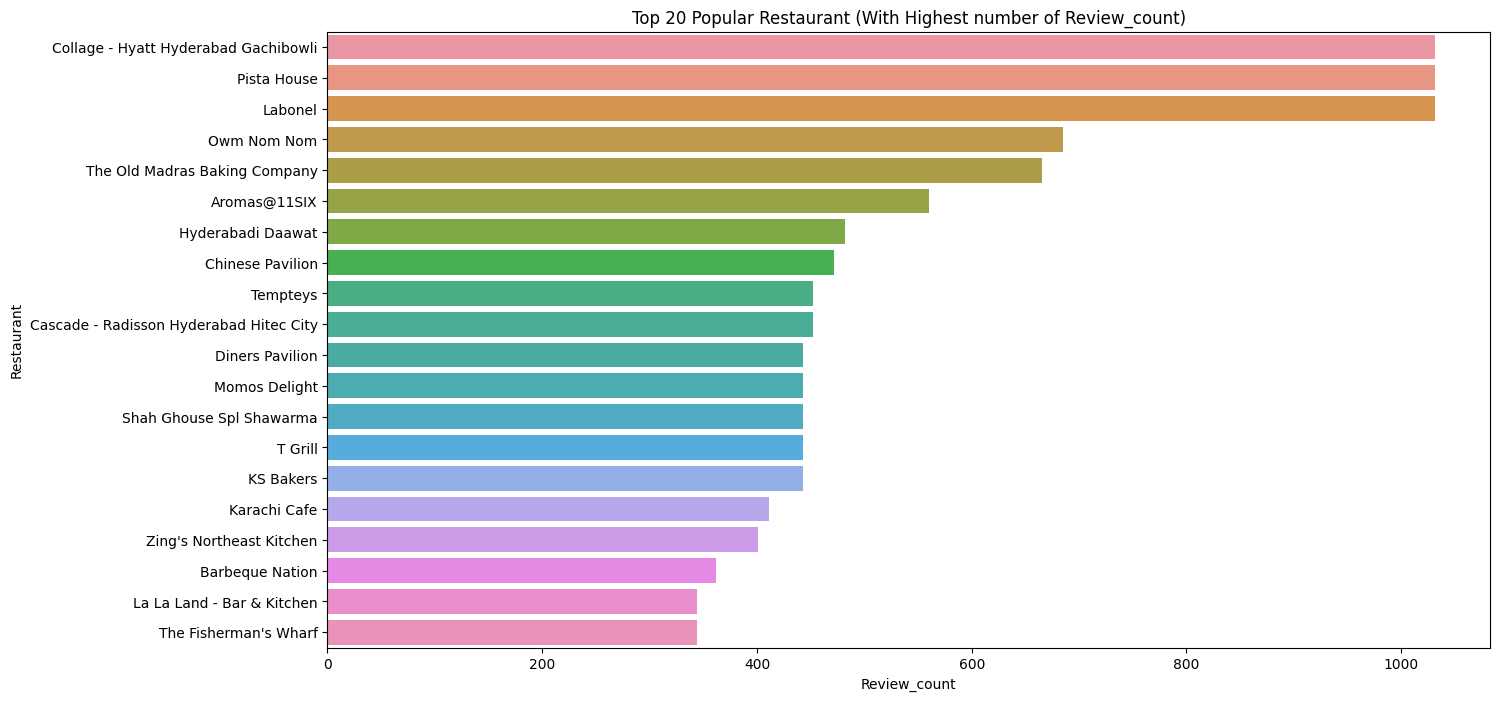

In [431]:
# Chart - 4 visualization code
# GRAPH - 1
# Bar plot on popular restaurant(With Highest number of Review_count)
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_sorted, x = 'Review_count', y = 'Restaurant')
plt.title('Top 20 Popular Restaurant (With Highest number of Review_count)')
plt.show()

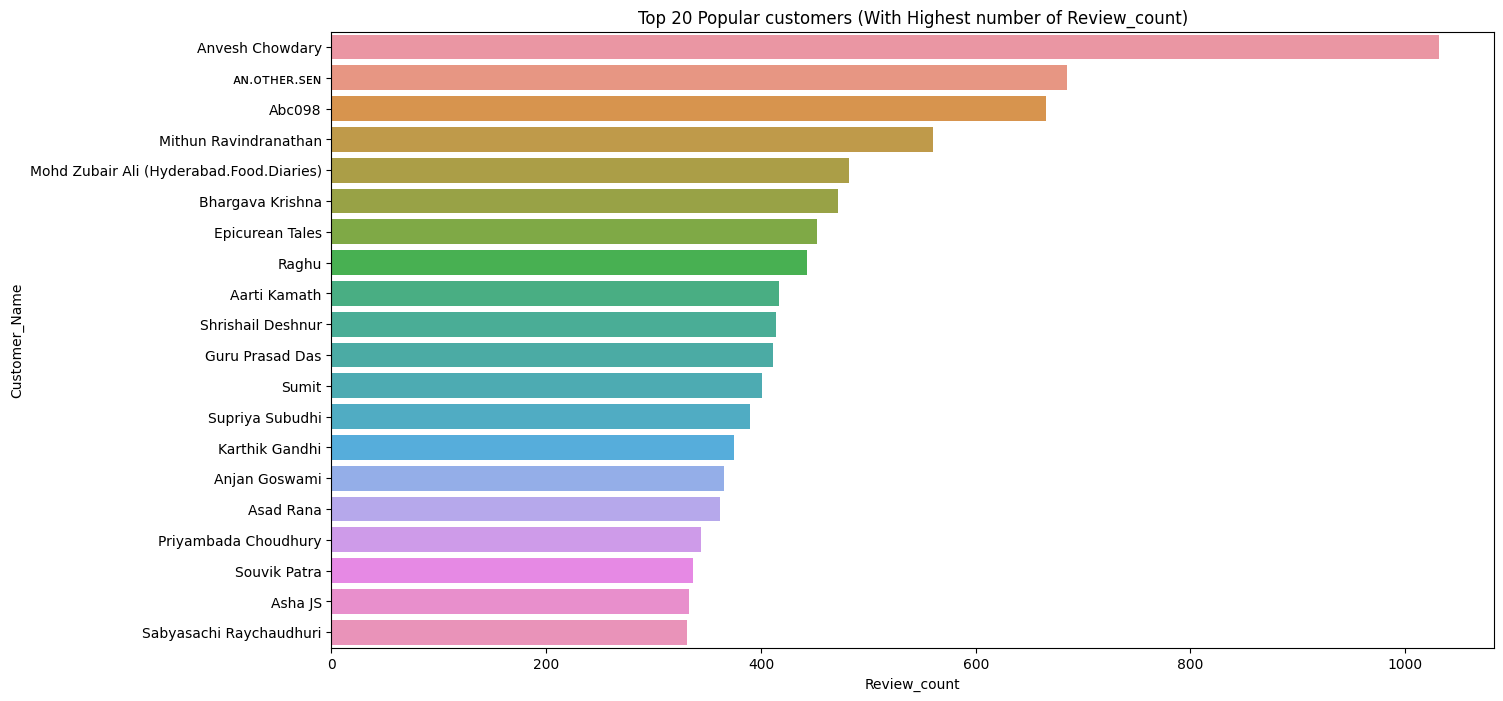

In [432]:
# GRAPH - 2
# Bar Plot on Popular customers With Highest number of Review_count
plt.figure(figsize=(15,8))
sns.barplot(data = popular_customersR_sorted, x = 'Review_count', y = 'Customer_Name')
plt.title('Top 20 Popular customers (With Highest number of Review_count)')
plt.show()

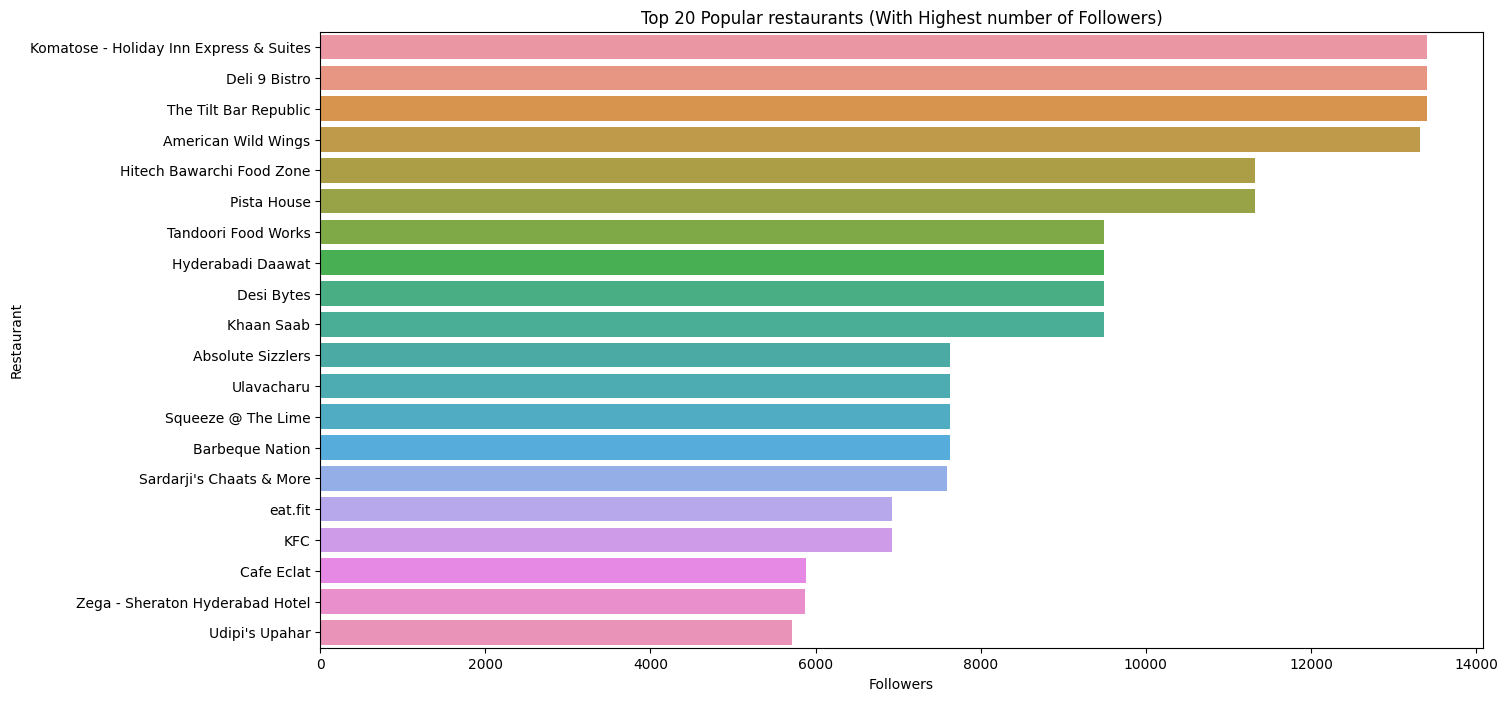

In [433]:
# GRAPH - 3
# Bar Plot on Popular Restaurant With Highest number of followers
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_by_followers_sorted, x = 'Followers', y = 'Restaurant')
plt.title('Top 20 Popular restaurants (With Highest number of Followers)')
plt.show()

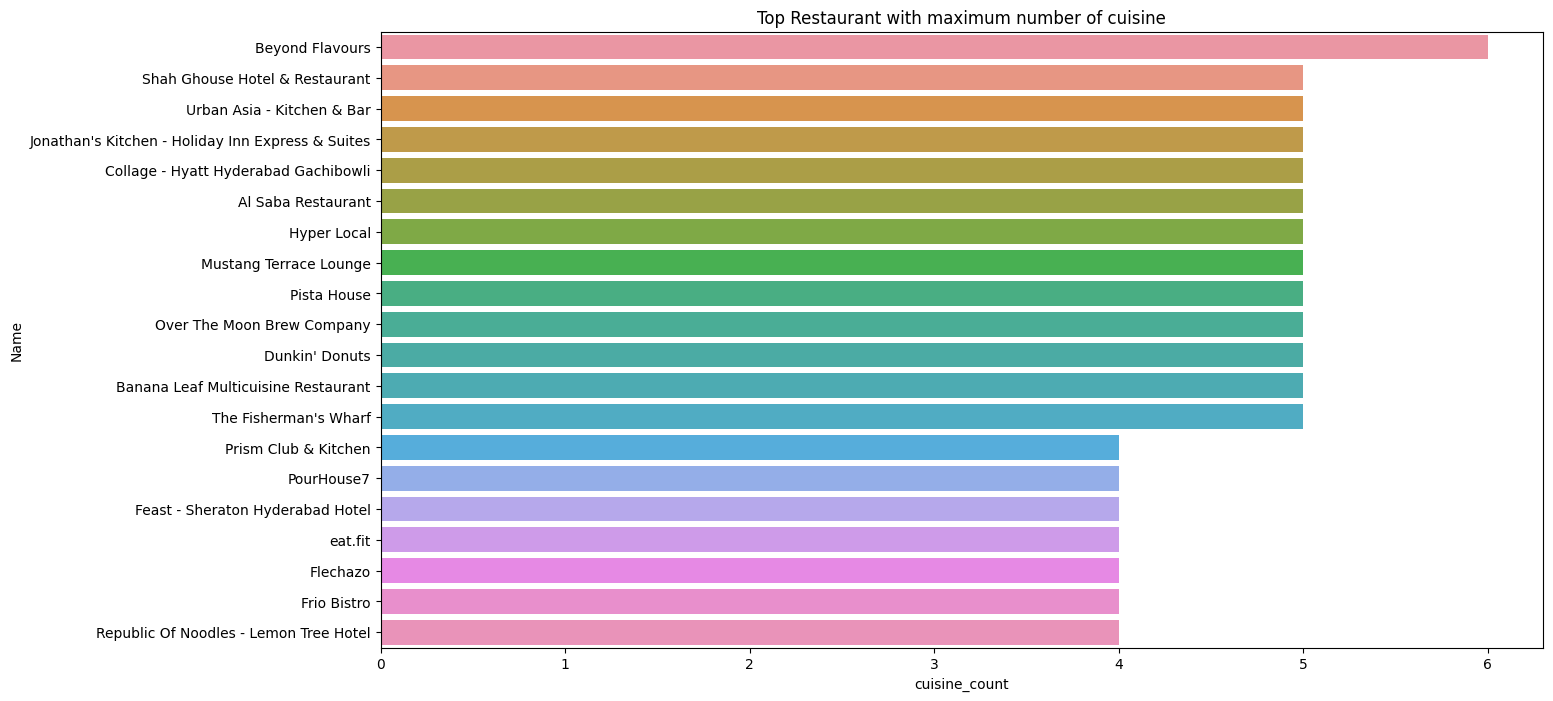

In [434]:
# GRAPH - 4
# Bar Plot on Restaurant with maximum number of cuisine
plt.figure(figsize=(15,8))
sns.barplot(data = topRestarant_sorted, x = 'cuisine_count', y = 'Name')
plt.title('Top Restaurant with maximum number of cuisine')
plt.show()

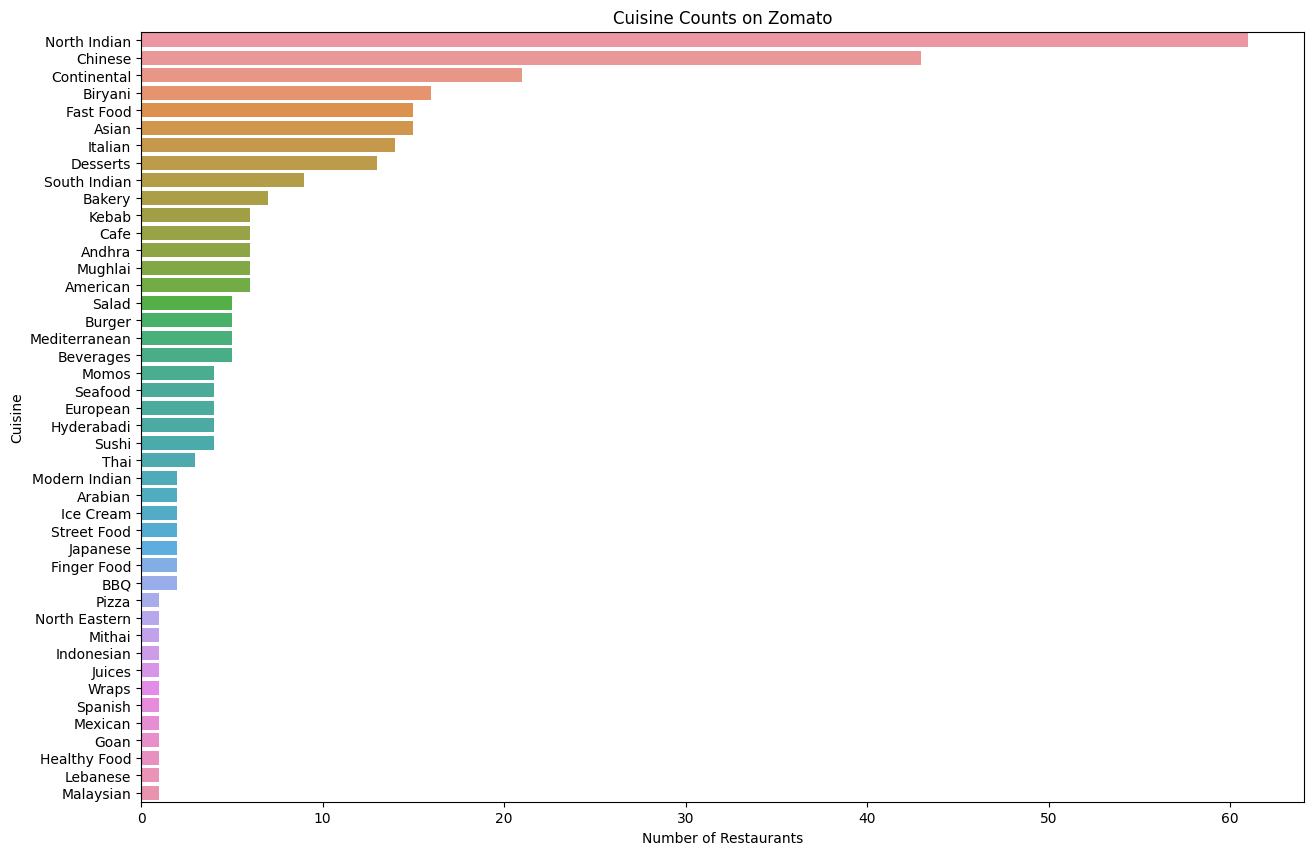

In [435]:
# GRAPH - 5
# Bar Plot on Total cuisine count
plt.figure(figsize=(15,10))
sns.barplot(x='Number of Restaurants', y='Cuisine', data=cuisine_df)
plt.title('Cuisine Counts on Zomato')
plt.show()

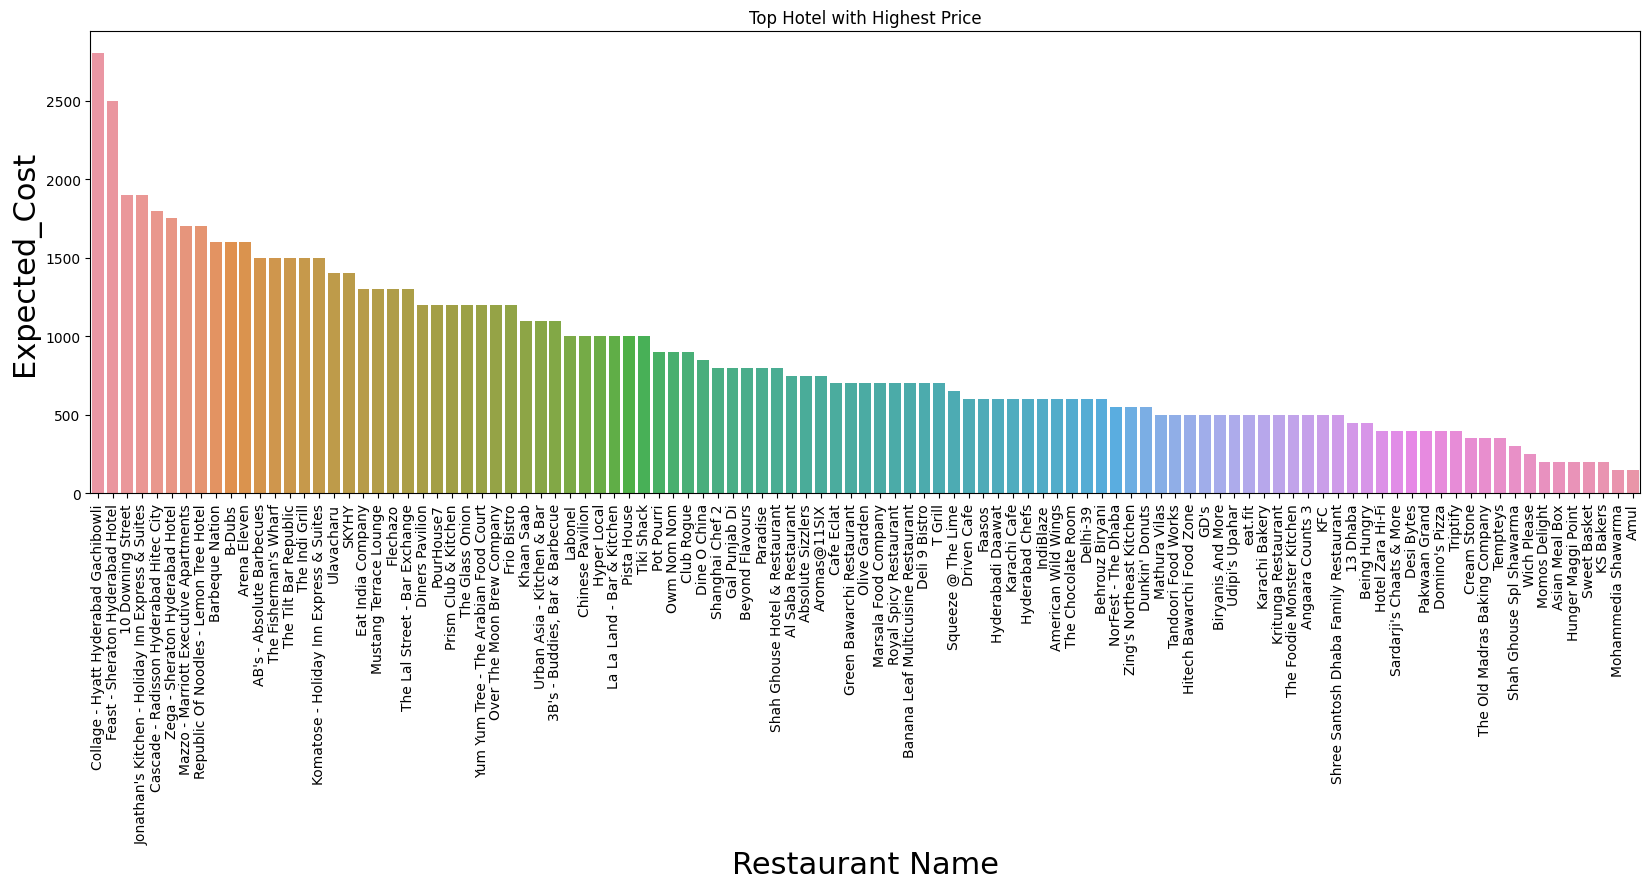

In [436]:
# GRAPH - 6
# Extracting name and price 
hotel_cost = zomato_data.sort_values('Cost', ascending = False)[['Restaurant_name','Cost']]
# Checking Relationship of neighbourhood group and price of listings
fig = plt.figure(figsize=[20,6])
sns.barplot(x='Restaurant_name', y='Cost',data=hotel_cost)
plt.xlabel('Restaurant Name', size = 22)
plt.ylabel('Expected_Cost', size = 22)
plt.title('Top Hotel with Highest Price')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts indicates the frequency counts of values for the different levels of a categorical variable. Sometimes, bar charts exhibit different statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

* Collage - Hyatt Hyderabad Gachibowli, Pista House	and Labonel is the most reviewed restaurants having 1031 reviews. While La La Land - Bar & Kitchen and The Fisherman's Wharf has the lowest reviews.
* Anvesh Chowdary has posted the most number of reviews nearly 1031 reviews.
* Komatose - Holiday Inn Express & Suites, Deli 9 Bistro and The Tilt Bar Republic has highest number of followers nearly of 13410, it means we can conclude that may be this restaurants will have great performance.
* Beyond Flavour has maximum numbers of cuisines available so that customers can get any type of food which they want.
* North Indian Food is mostly available on nearly 60 number of restaurants. So we can conclude that north indian food is mostly ordered and demanded food by the customers followed by Chinese food. while malaysian, pizza etc are the less ordered and demanded cuisines.
* Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant among all the restaurants.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Since it is direct to consumer buisness, every above point is imporatant here. We found most and least reviews of the resaurant so that one can work on it. And this is how we gained positive insights.

#### Chart - 5 Line Plot on Bivariate Data (Bivariate Analysis)

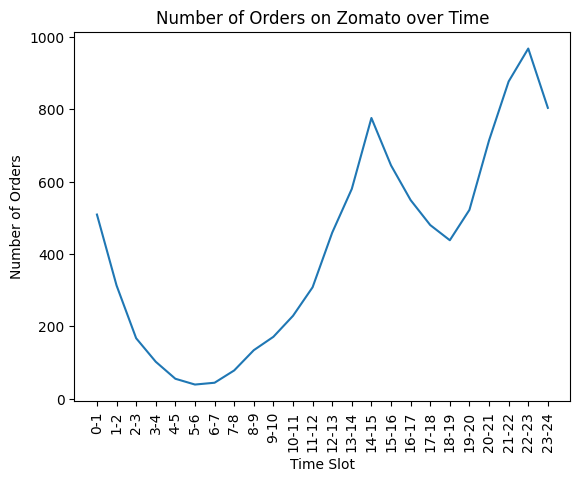

In [437]:
# Chart - 5 visualization code
# GRAPH - 1
# create a dictionary to store the data
data = {'Time Slot': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
        'Number of Orders': [509, 313, 167, 102, 55, 39, 44, 78, 134, 171, 229, 308, 459, 580, 776, 645, 549, 480, 438, 522, 714, 877, 968, 804]}
df = pd.DataFrame(data)

# create a line plot using seaborn
sns.lineplot(x='Time Slot', y='Number of Orders', data=df)
plt.title('Number of Orders on Zomato over Time')
plt.xticks(rotation=90)
plt.show()


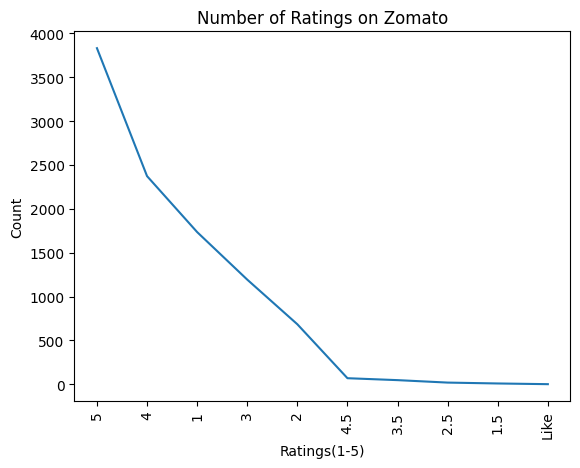

In [438]:
# GRAPH - 2
# create a line plot on ratings
sns.lineplot(x='Ratings(1-5)', y='Count', data=ratings_df)
plt.title('Number of Ratings on Zomato')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is a type of graph that displays data using a number of connected points or markers, connected by straight lines. It is commonly used to visualize relationships between two different variables. Line plots are useful for assessing trends and patterns in data and can be used to compare multiple sets of data.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* From graph 1, we can infer that most of the people orders food between 3PM to 4PM and 10PM to 11PM. Least number of order is between 3AM to 7AM may be because of very early morning timing.
* From graph 2, we can see that 5 star rating has more number of count than 4 star. Ratings from 4.5 star to 1.5 star has least and similar number of count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We can see the peak hours for order on zomato app. From this perspective, we can suggest zomato to throw more offer at this timings so that zomato can increse their order number and their cutomers.

#### Chart - 6 Scatter Plot on review_length v/s ratings (Bivariate)

In [971]:
# Chart - 6 visualization code
# Plotting Scatter plot of review_length column
import plotly.express as px
fig = px.scatter(reviews_df, x = reviews_df['Rating'], y = reviews_df['Review_length'])
fig.update_layout(title_text = "Rating vs Review Length")
fig.show()

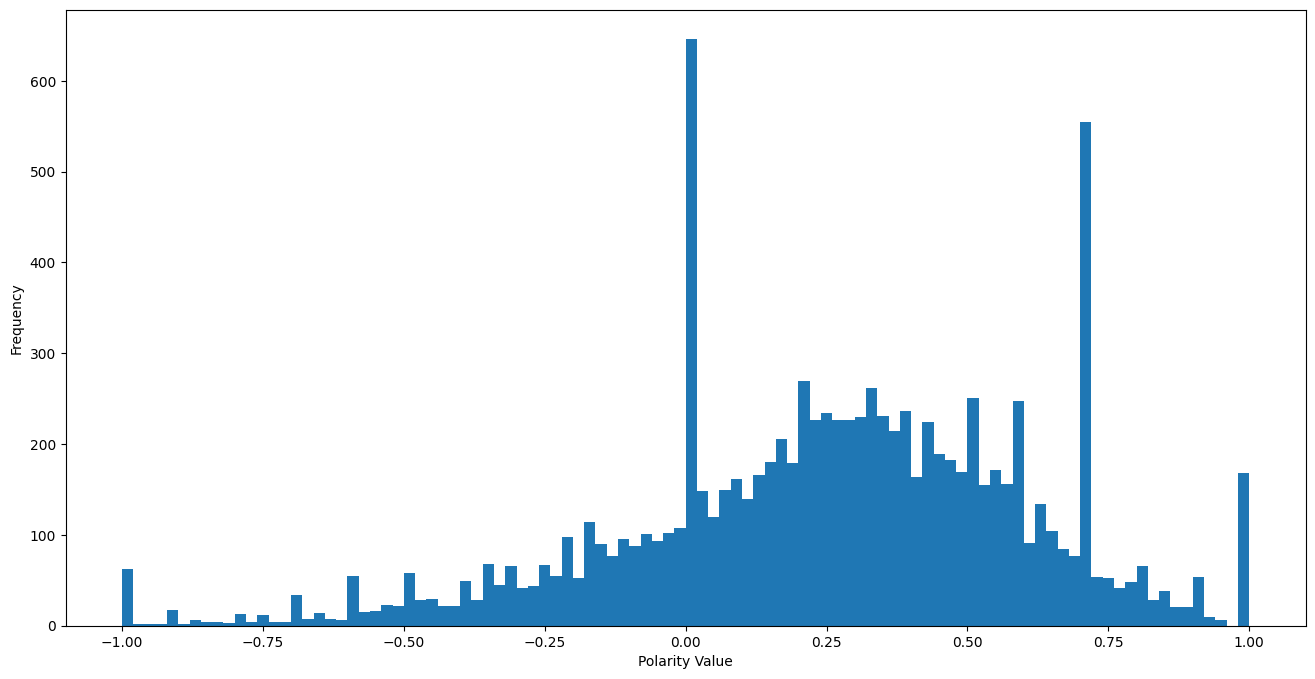

In [974]:
# GRAPH - 2
# Plotting the graph for polarity of positive, negetive and neutral reviews
plt.figure(figsize=(16,8))
reviews_df['Polarity'].plot(kind='hist', bins=100)
plt.xlabel("Polarity Value")
plt.show()

##### 1. Why did you pick the specific chart?

**Scatter plot** is dotted representation of the two variables in a datasets which uses a coordinate axes to plot the points. A Scatter (XY) Plot has points that show the relationship between two sets of data.

**TextBlob** is a Python library for processing textual data. It provides a simple API for divding into common natural language processing tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.



##### 2. What is/are the insight(s) found from the chart?

Insights:
* From Graph 1, it shows us that length of review doesn't impact ratings of the restaurants.
* Ploarity analyzes the text ranges and search for words that express sentiments such as good or bad assignes a score to text in following manner: emotional negative (-2), rational negative (-1), neutral (0), rational positive (+1), and emotional positive (+2). In practice, neutral often means no opinion or sentiment expressed. The above graph 2 shows us the majority of reviews are nuetral 0, probably suggesting mixture of bad and good words in reviews.
* Also the number of positive reviews (greater than 0) are higher than negative reviews.
* More than 200 odd reviews have very high positive sentiments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We get positive business insights with high number of positive reviews 

#### Chart - 7 3D Scatter Plot (Multivariate) 

In [975]:
restaurant_df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Restaurant_timings', 'cuisine_count'],
      dtype='object')

In [976]:
# Chart - 7 visualization code
# 3D Scatter plot of review_count v/s review_length v/s ratings

# Creating variable col1 with temporary merged data
col1 = reviews_df.merge(restaurant_df[['Restaurant_name','Cost']], on = 'Restaurant_name')
data = col1.sort_values('Cost', ascending  = False)

fig = px.scatter_3d(data, x='Review_length', y='Cost', z='Rating')
fig.update_layout(title_text="Review Length vs Rating vs Cost " )

fig.show()

In [977]:
# GRAPH - 2
# 3D Scatter plot of cuisine count v/s cost v/s ratings

# Creating variable col2 with temporary merged data
col2 = reviews_df.merge(restaurant_df[['Restaurant_name','Cost','cuisine_count']], on = 'Restaurant_name')
data = col2.sort_values('Cost', ascending  = False)

fig = px.scatter_3d(data, x='cuisine_count', y='Cost', z='Rating')
fig.update_layout(title_text="cuisine_count vs Rating vs Cost ", )

fig.show()

##### 1. Why did you pick the specific chart?


3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* The 3D plot says that having high number of reviews length also has high number of ratings and high number of cost.
* Average ratings has very small length of review. Number of reviews do not show much impact on ratings.
* Low rated restaurants has low price.

----
* Another 3D plot says that cuisine count neither affecting the cost nor the ratings.
* Average cuisine count has average cost and average ratings. While low rated restaurants also has high cuisine count. This means that having more number of cuisines doesn’t means the restaurant is good. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Box Plot on Numerical Features (Multivariate)

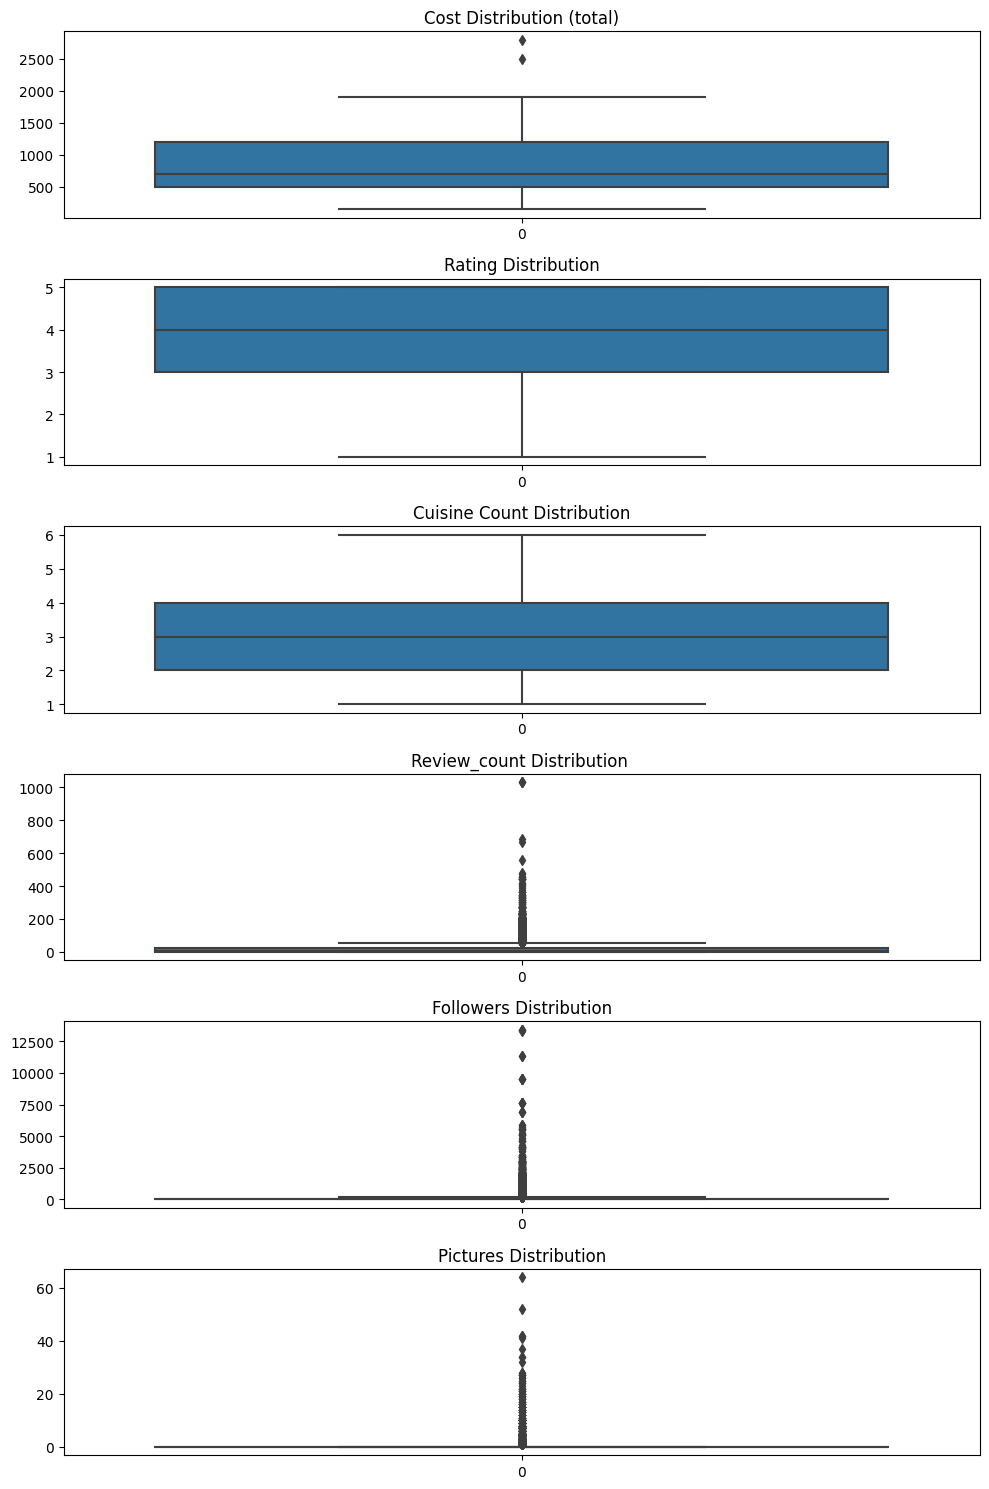

In [978]:
# Chart - 8 visualization code
# Checking for outliers
fig, ax= plt.subplots(6,1, figsize=(10,15))

ax[0].set_title("Cost Distribution (total)")
sns.boxplot(restaurant_df['Cost'], ax=ax[0])

ax[1].set_title("Rating Distribution")
sns.boxplot(reviews_df['Rating'], ax=ax[1])

ax[2].set_title("Cuisine Count Distribution")
sns.boxplot(restaurant_df['cuisine_count'], ax=ax[2])

ax[3].set_title("Review_count Distribution ")
sns.boxplot(reviews_df['Review_count'], ax=ax[3])

ax[4].set_title("Followers Distribution")
sns.boxplot(reviews_df['Followers'], ax=ax[4])

ax[5].set_title("Pictures Distribution")
sns.boxplot(reviews_df['Pictures'], ax=ax[5])

fig.tight_layout()
fig.show()
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are generally used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide general information about a group of data that whether the data has symmetrical property, skewness, have variance, have outliers or not. So for checking the availability of the rooms, we have used the box plot and also to check outliers we have used it.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* We found that Cost column has some values with high cost of 2500 or more for per person which shows us that there are some most expensive restaurants.   
* Ratings has no outlier and has average ratings of 4 star and maximum ratings of 5 star.
* Maximum restaurant has a 6 types of cuisines. Average cuisine count is 3 means restaurants has on an average 3 cuisines. 
* Reviews counts distribution is looking abnormal i.e. some restaurants has a more than 1000 number of reviews means may be it is a outlier.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Correlation Heatmap (Multivariate)

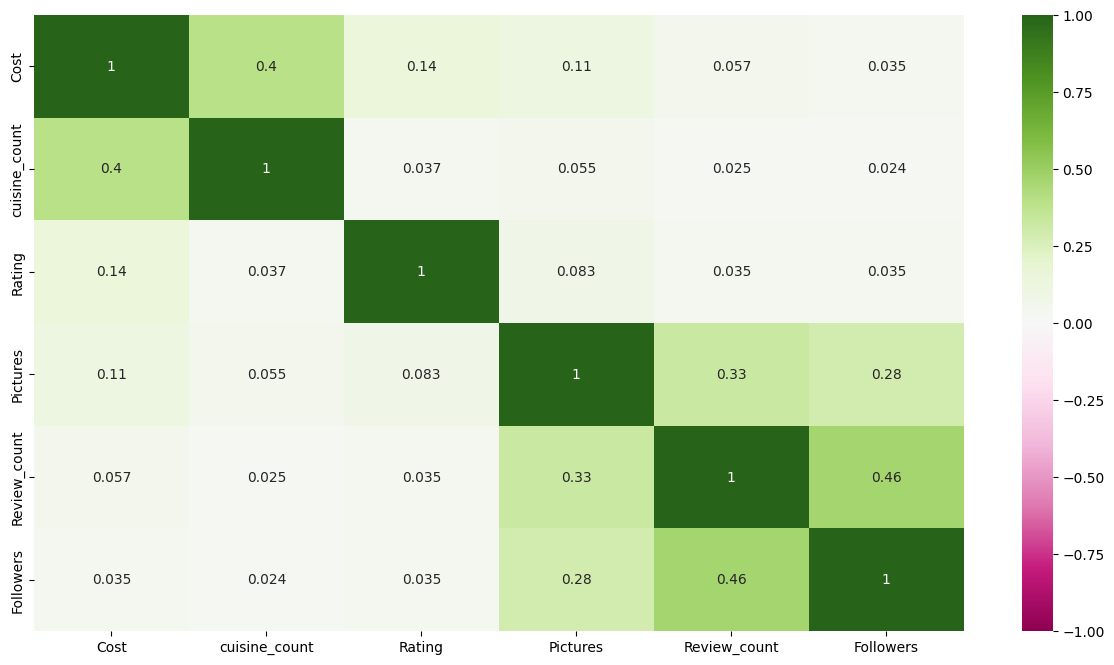

In [448]:
# Correlation Heatmap visualization code
correlation = zomato_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, cmap = 'PiYG', annot = True, vmin = -1, vmax=1)
plt.show()

In [449]:
# zomato_data is the merged data of zomato restaurant csv and zomatao reviews csv
corr_matrix = zomato_data.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Cost,cuisine_count,Rating,Pictures,Review_count,Followers
Cost,1.00,0.40,0.14,0.11,0.06,0.04
cuisine_count,0.40,1.00,0.04,0.05,0.03,0.02
Rating,0.14,0.04,1.00,0.08,0.03,0.04
Pictures,0.11,0.05,0.08,1.00,0.33,0.28
Review_count,0.06,0.03,0.03,0.33,1.00,0.46
Followers,0.04,0.02,0.04,0.28,0.46,1.00


##### 1. Why did you pick the specific chart?

A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* There are 46% of positive correlation b/w Review_count and Followers.
* There are positive correlation between Cuisine_count and cost i.e. the restaurant with more number of cuisine has higher cost as compared to the restauranr with less number of cuisine.
* There are also 33% of positive correlation b/w review_count and pictures.
* we conclude that there is no strong correlation between any variables

#### Chart - 10 - Pair Plot (Multivariate)

In [450]:
# Pair Plot visualization code
# sns.pairplot(zomato_data)
# plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, we used pair plot to analyse the patterns of data and realationship with eachother. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
**The mean cuisine count in Zomato data is at most 3.010534**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis:** H0: The mean cuisine count in zomato data is 3.010534 and μ=3.010534
* **Alternate Hypothesis:** HA : The mean cuisine count in zomato data is greater than 3.010534

#### 2. Perform an appropriate statistical test.

In [451]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Set the null hypothesis mean
null_hypothesis_mean = 3.010534

# Calculate the sample mean and standard deviation
sample_mean = np.mean(zomato_data['cuisine_count'])
sample_std = np.std(zomato_data['cuisine_count'], ddof=1)

# Calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_1samp(zomato_data['cuisine_count'], null_hypothesis_mean, alternative='greater')

# Print the results
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

Sample Mean: 3.0105337078651684
Sample Standard Deviation: 1.202981729163719
T-Statistic: -2.424534256035843e-05
P-Value: 0.5000096722496393


* The sample mean is 3.0105337078651684. This is the average cuisine count for the sample of restaurants in the Zomato data.
* The sample standard deviation is 1.202981729163719. This measures the variability of the cuisine counts in the sample.
* The t-statistic is -2.424534256035843e-05. This measures the difference between the sample mean and the null hypothesis mean in units of the standard error of the sample mean.
* The p-value is 0.5000096722496393. This is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis is true.

* Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the mean cuisine count in the Zomato data is significantly greater than 3.010534. In other words, we cannot say with confidence that the mean cuisine count is greater than 3.010534 based on the available data.

##### Which statistical test have you done to obtain P-Value?

We have use a one-sample t-test 

##### Why did you choose the specific statistical test?

We chose a one-sample t-test for this hypothesis test because we are interested in testing if the mean cuisine count in the Zomato data is significantly greater than a specific value (3.010534 in this case). We have a single sample of cuisine counts, and we are comparing the mean of that sample to a known null hypothesis mean.

A t-test is an appropriate test to use when we have a small sample size (less than 30) and the population standard deviation is unknown. In this case, we are using the sample standard deviation to estimate the population standard deviation. The one-sample t-test allows us to compare the sample mean to a known null hypothesis mean and determine if the difference between them is statistically significant.

Additionally, we are testing if the mean cuisine count is greater than a specific value, which makes this a one-tailed test. The alternative='greater' argument in the ttest_1samp function specifies that we are conducting a one-tailed test.

### Hypothetical Statement - 2
**The Standard Deviation of Followers is equal to 620**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis:** H0: The standard Deviation of Followers is  σ = 620
* **Alternate Hypothesis:** HA : The standard Deviation of Followers is  not equal to 620

#### 2. Perform an appropriate statistical test.

In [452]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2

# Sample data
followers = zomato_data['Followers'].tolist()
n = len(followers)
s = zomato_data['Followers'].std() # sample standard deviation
sigma = 620 # hypothesized standard deviation

# Calculate the chi-square statistic
chi2_stat = (n-1) * s**2 / sigma**2

# Calculate the p-value
p_value = 1 - chi2.cdf(chi2_stat, df=n-1)

# Print the results
print('Sample size:', n)
print('Sample standard deviation:', s)
print('Hypothesized standard deviation:', sigma)
print('Chi-square statistic:', chi2_stat)
print('P-value:', p_value)


Sample size: 9968
Sample standard deviation: 619.9217848127857
Hypothesized standard deviation: 620
Chi-square statistic: 9964.485414199475
P-value: 0.5052219060284285


* The calculated p-value is 0.5052, which is greater than the significance level of 0.05.
* Therefore, we fail to reject the null hypothesis that the standard deviation of followers is equal to 620. This means that there is not enough evidence to suggest that the standard deviation of followers is significantly different from 620.

* The chi-square statistic is 9964.49, which indicates that there is a relatively large difference between the observed sample variance and the hypothesized variance (which is 620 squared). However, since the sample size is large (n=9968), even small differences can result in a large chi-square statistic. This is why we use the p-value to assess the significance of the result. In this case, the p-value suggests that the difference between the observed sample variance and the hypothesized variance is not significant.






##### Which statistical test have you done to obtain P-Value?

chi-square statistics

##### Why did you choose the specific statistical test?

We chose the chi-square goodness of fit test for this problem because we are testing whether the sample standard deviation of followers in the Zomato Restaurant clustering and Sentiment analysis dataset is significantly different from a hypothesized value of 620. The chi-square goodness of fit test is a commonly used statistical test for comparing a sample distribution with a hypothesized distribution.

In this case, we can assume that the sample distribution of followers follows a normal distribution, and the hypothesized standard deviation is known. Therefore, we can use the chi-square test statistic to compare the observed sample variance with the hypothesized variance. If the calculated chi-square statistic is large and the p-value is small, we can reject the null hypothesis and conclude that the standard deviation of followers is significantly different from the hypothesized value. If the calculated chi-square statistic is small and the p-value is large, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the standard deviation of followers is significantly different from the hypothesized value.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [453]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

#### Merging restaurant_df and reviews_df together

In [72]:
restaurant_df.rename({'Name':'Restaurant_name', 'Timings':'Restaurant_timings'},axis=1, inplace=True )
restaurant_df.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,3


In [73]:
reviews_df.rename({'Restaurant':'Restaurant_name', 'Time':'Review_timing'}, axis=1, inplace=True)
reviews_df.head(2)

,Restaurant_name,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0,1,2,222,0.660000
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0,3,2,144,0.606667


In [74]:
# merging both the data together on Restaurant_name column
zomato_data = pd.merge(restaurant_df, reviews_df.drop_duplicates(), on = 'Restaurant_name', how='left')
zomato_data.shape

(9968, 16)

In [75]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9968 entries, 0 to 9967
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Restaurant_name     9968 non-null   object        
 1   Links               9968 non-null   object        
 2   Cost                9968 non-null   int64         
 3   Collections         4965 non-null   object        
 4   Cuisines            9968 non-null   object        
 5   Restaurant_timings  9868 non-null   object        
 6   cuisine_count       9968 non-null   int64         
 7   Customer_Name       9961 non-null   object        
 8   Review              9963 non-null   object        
 9   Rating              9961 non-null   float64       
 10  Review_timing       9961 non-null   datetime64[ns]
 11  Pictures            9963 non-null   float64       
 12  Review_count        9963 non-null   float64       
 13  Followers           9963 non-null   float64     

In [76]:
zomato_data.describe()

,Cost,cuisine_count,Rating,Pictures,Review_count,Followers,Review_length,Polarity
count,9968.000000,9968.000000,9961.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000
mean,871.518860,3.010534,3.601044,0.751280,23.941283,162.975710,279.527953,0.250475
std,503.481827,1.202982,1.483461,2.574754,50.588243,619.921785,338.564768,0.364958
min,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,500.000000,2.000000,3.000000,0.000000,1.000000,1.000000,144.000000,0.004015
50%,700.000000,3.000000,4.000000,0.000000,4.000000,7.000000,189.000000,0.278704
75%,1200.000000,4.000000,5.000000,0.000000,22.000000,63.000000,321.000000,0.505556
max,2800.000000,6.000000,5.000000,64.000000,1031.000000,13410.000000,5212.000000,1.000000


### 1. Handling Missing Values

#### Handling Missing Values in whole dataset (Zomato merged Dataset)

In [77]:
pd.set_option('display.max_rows', None)
# Handling Missing Values & Missing Value Imputation
zomato_data.isna().sum()

Restaurant_name          0
Links                    0
Cost                     0
Collections           5003
Cuisines                 0
Restaurant_timings     100
cuisine_count            0
Customer_Name            7
Review                   5
Rating                   7
Review_timing            7
Pictures                 5
Review_count             5
Followers                5
Review_length            5
Polarity                 5
dtype: int64

In [78]:
# checking null values in Collections
missing_percentage = ((zomato_data['Collections'].isnull().sum())/(len(zomato_data['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 50.19%


In [79]:
# We can drop the collection column since it has more than 50% of null values
# But we are Filling null value in collection column with 'not avaialble' tag.
zomato_data['Collections'].fillna('Not Available', inplace=True)
zomato_data['Collections'].isna().sum()

0

In [80]:
# Dropping null value in remaining column as it is very less & will not affect our data
zomato_data.dropna(inplace=True) 
zomato_data.isnull().sum()

Restaurant_name       0
Links                 0
Cost                  0
Collections           0
Cuisines              0
Restaurant_timings    0
cuisine_count         0
Customer_Name         0
Review                0
Rating                0
Review_timing         0
Pictures              0
Review_count          0
Followers             0
Review_length         0
Polarity              0
dtype: int64

In [81]:
zomato_data.shape

(9861, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are two approch to handle the missing values i.e. Deleting the Missing values and Imputing the Missing Values.

We have used both of the methods here.

In this merged Zomato Dataset, the 'collections' column has more number of rows with null values so there we have use second approch of imputing the null values. Here, in this column, we are imputing the null values with arbitary values and made an educated guess about the missing value with 'Not Available' tag. Next remaining column has very less number of null values so we have uses the first approach to delete the missing valuees, we have deleted the missing value with the dropna() function.  

### 2. Handling Outliers

We are using seperate data of zomato restaurant and zomato review here.

#### Anomaly Detection

Univariate Anomaly Detection

Cost Variable Analysis

In [82]:
# Handling Outliers & Outlier treatments
# Checking skewness and kurtosis for cost column
print("Skewness: %f" % restaurant_df['Cost'].skew())
print("Kurtosis: %f" % restaurant_df['Cost'].kurt())

Skewness: 1.143450
Kurtosis: 1.534478


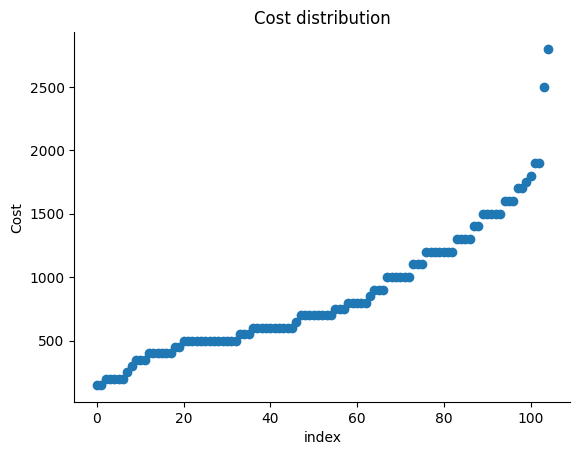

In [83]:
plt.scatter(range(restaurant_df.shape[0]), np.sort(restaurant_df['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

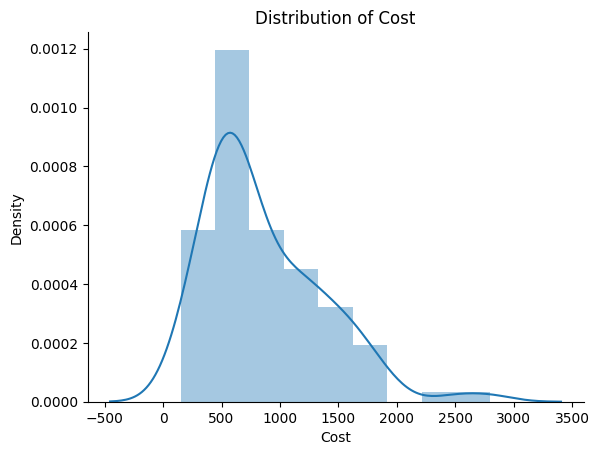

In [84]:
sns.distplot(restaurant_df['Cost'])
plt.title("Distribution of Cost")
sns.despine()

Cost variable is highly positively skewed and having some outliers also. So we will further work on it using Anomoly Detection Algorithm.

Ratings Variable Analysis

In [85]:
# Checking skewness and kurtosis for rating column
print("Skewness: %f" % reviews_df['Rating'].skew())
print("Kurtosis: %f" % reviews_df['Rating'].kurt())

Skewness: -0.707928
Kurtosis: -0.946219


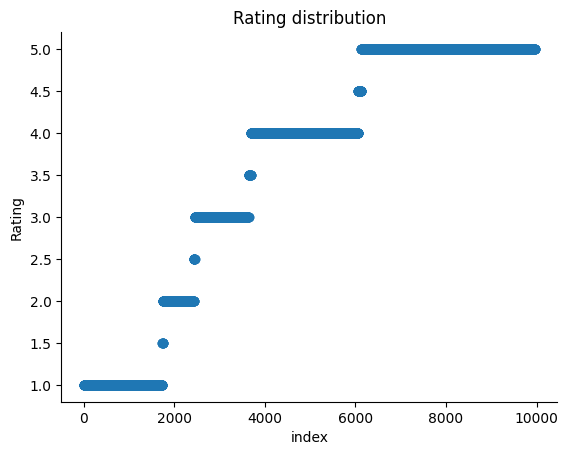

In [86]:
plt.scatter(range(reviews_df.shape[0]), np.sort(reviews_df['Rating'].values))
plt.xlabel('index')
plt.ylabel('Rating')
plt.title("Rating distribution")
sns.despine()

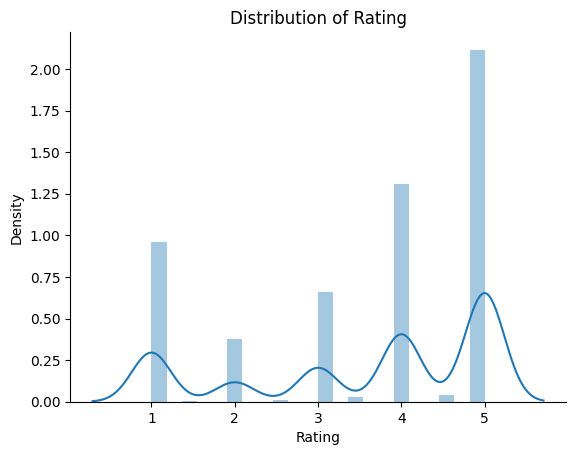

In [87]:
sns.distplot(reviews_df['Rating'])
plt.title("Distribution of Rating")
sns.despine()

Ratings variable is slightly skewed and having no outliers. So we will leave it as it is.

Followers Variable Analysis

In [88]:
# Checking skewness and kurtosis for follower column
print("Skewness: %f" % reviews_df['Followers'].skew())
print("Kurtosis: %f" % reviews_df['Followers'].kurt())

Skewness: 10.110880
Kurtosis: 151.860501


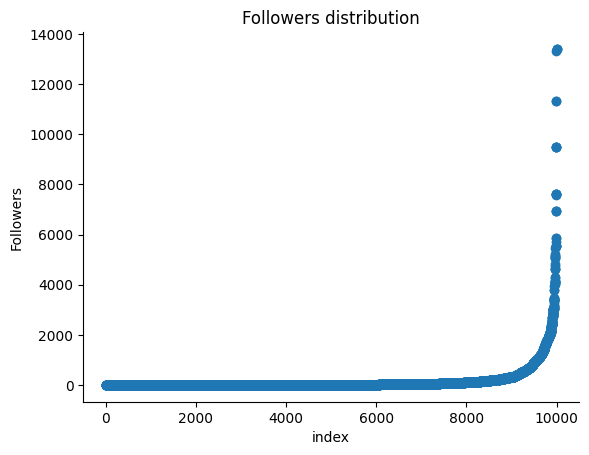

In [89]:
plt.scatter(range(reviews_df.shape[0]), np.sort(reviews_df['Followers'].values))
plt.xlabel('index')
plt.ylabel('Followers')
plt.title("Followers distribution")
sns.despine()

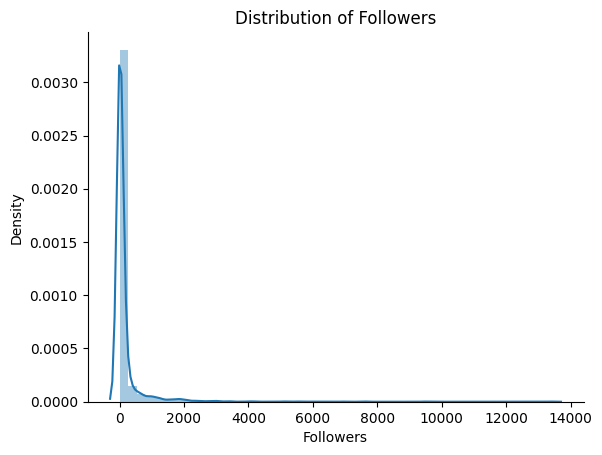

In [90]:
sns.distplot(reviews_df['Followers'])
plt.title("Distribution of Followers")
sns.despine()

Followers variable is highly positively skewed and having some outliers. So we will further work on it using Anomoly Detection Algorithm.

Polarity Variable Analysis

In [91]:
# Checking skewness and kurtosis for Polarity column
print("Skewness: %f" % reviews_df['Polarity'].skew())
print("Kurtosis: %f" % reviews_df['Polarity'].kurt())

Skewness: -0.572453
Kurtosis: 0.545082


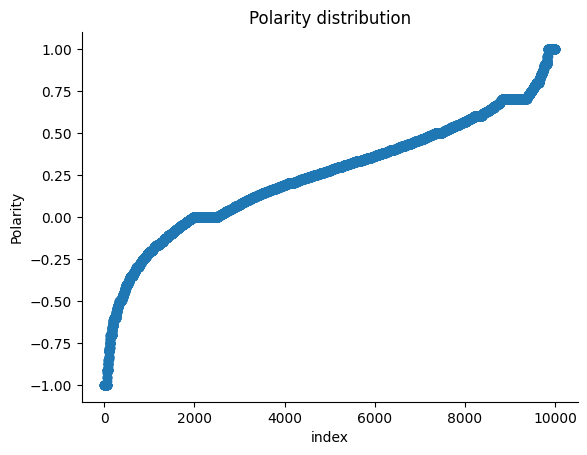

In [92]:
plt.scatter(range(reviews_df.shape[0]), np.sort(reviews_df['Polarity'].values))
plt.xlabel('index')
plt.ylabel('Polarity')
plt.title("Polarity distribution")
sns.despine()

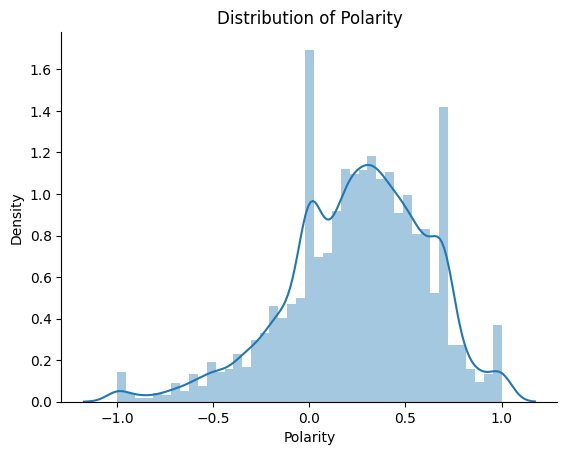

In [93]:
sns.distplot(reviews_df['Polarity'])
plt.title("Distribution of Polarity")
sns.despine()

Polarity Column has nearly symmetrical data and has not outliers

**Isolation Forest Algorithm for Cost**

In [94]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(restaurant_df['Cost'].values.reshape(-1, 1))
restaurant_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(restaurant_df['Cost'].values.reshape(-1, 1))
restaurant_df['outlier_univariate_Cost'] = isolation_forest.predict(restaurant_df['Cost'].values.reshape(-1, 1))

In [95]:
restaurant_df.head()

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,anomaly_score_univariate_Cost,outlier_univariate_Cost
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,0.294150,1
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,3,0.294150,1
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4,0.265582,1
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM,5,0.294150,1
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli,1200,"Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest","Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)",5,0.303047,1


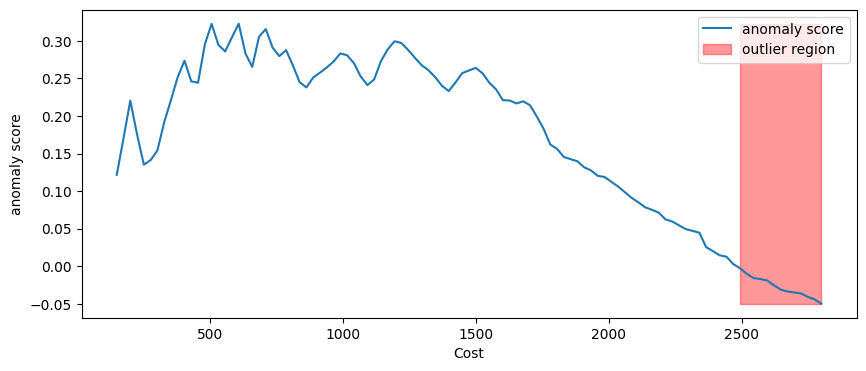

In [96]:
xx = np.linspace(restaurant_df['Cost'].min(), restaurant_df['Cost'].max(), len(restaurant_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

**Isolation Forest Algorithm for Followers**

In [97]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=2, contamination=0.01)
isolation_forest.fit(reviews_df['Followers'].isna().values.reshape(-1, 1))
reviews_df['anomaly_score_univariate_followers'] = isolation_forest.decision_function(reviews_df['Followers'].values.reshape(-1, 1))
reviews_df['outlier_univariate_followers'] = isolation_forest.predict(reviews_df['Followers'].values.reshape(-1, 1))

In [98]:
reviews_df.head(10)

,Restaurant_name,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,Review_length,Polarity,anomaly_score_univariate_followers,outlier_univariate_followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0,1,2,222,0.660000,0.0,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0,3,2,144,0.606667,0.0,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,2019-05-24 22:54:00,0,2,3,189,0.540000,0.0,1
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,2019-05-24 22:11:00,0,1,1,148,0.500000,0.0,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,2019-05-24 21:37:00,0,3,2,160,0.577500,0.0,1
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPradeecp and subro best service\nFood is good. Papiya good hostess and ur caption very good. This is 4star restaurant.",5.0,2019-05-24 15:22:00,0,1,0,161,0.785000,0.0,1
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, all the food we ordered was very tasty, service is also gud, worth visit. Its reasonable as well. Really a must visit place.",5.0,2019-05-24 01:02:00,0,1,0,170,0.280000,0.0,1
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally visited this place...ambience was so good and coming to food crispy corn is nice. Tawa fish was ok... Basket Biryani disappointed us... biryani was ok but not flattering as they claimed.. Staff was polite and prompt especially pradeep and Suman.,4.0,2019-05-23 15:01:00,0,1,0,288,0.256250,0.0,1
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy food . Courteous staff . Shubro and pradeep and papiya gave excellent service to our corporate team dinner . Overall great for team dinners and party",5.0,2019-05-22 23:12:00,0,1,1,194,0.536735,0.0,1
9,Beyond Flavours,Smarak Patnaik,"Came for the birthday treat of a close friend. Perfect place for a treat like this. Very hospitable and cooperative staff. Food was delicious, ambience was really good with the music and the lighting. Chili honey lotus stem is a must try here. Special mention to Papiya who took good care of us.",5.0,2019-05-22 22:37:00,0,1,1,295,0.659524,0.0,1


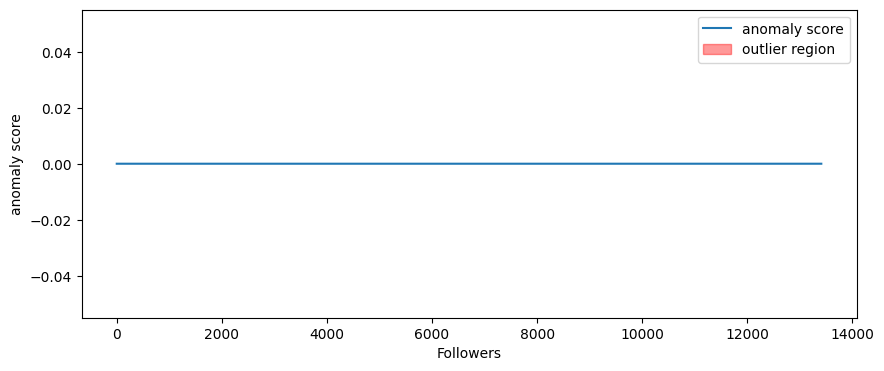

In [99]:
xx = np.linspace(reviews_df['Followers'].min(), reviews_df['Followers'].max(), len(reviews_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Followers')
plt.show();

Outlier/Anomaly Treatment 

We are performing outlier treatment on zomato merged dataset so that we can see the outlier removal process result in our main dataset.

In [100]:
def drop_outliers_iqr(df, column):
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound, lower_bound

outlier treatment on cost column

In [101]:
# calling the above function and Dropping the outlier in cost column
cost_after_outlier1 = drop_outliers_iqr(df = zomato_data, column = 'Cost')[1]
cost_after_outlier0 = drop_outliers_iqr(df = zomato_data, column = 'Cost')[0]

In [102]:
# creating lower and upper boundary for cost column
zomato_data.loc[zomato_data['Cost'] <= drop_outliers_iqr(df=zomato_data, column='Cost')[1], 'Cost'] = cost_after_outlier1
zomato_data.loc[zomato_data['Cost'] >= drop_outliers_iqr(df=zomato_data, column='Cost')[0], 'Cost'] = cost_after_outlier0

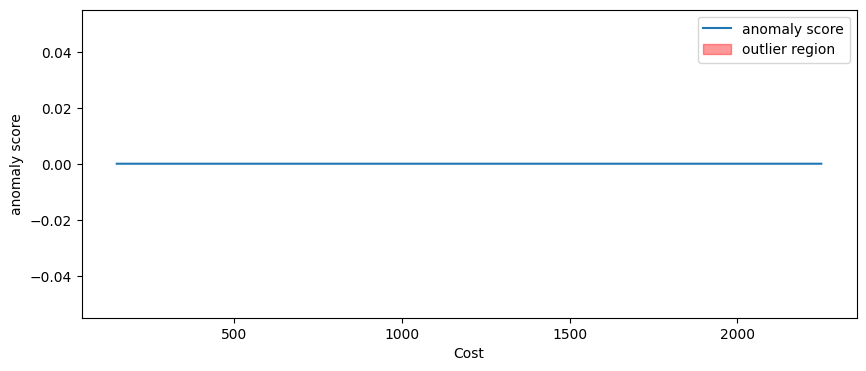

In [103]:
# Cost column after outlier removal
xx = np.linspace(zomato_data['Cost'].min(), zomato_data['Cost'].max(), len(zomato_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

outlier treatment on followers column

In [104]:
# calling the above function and Dropping the outlier in follower column
followers_after_outlier1 = drop_outliers_iqr(df = zomato_data, column = 'Followers')[1]
followers_after_outlier0 = drop_outliers_iqr(df = zomato_data, column = 'Followers')[0]

In [105]:
# creating lower and upper boundary for cost column
zomato_data.loc[zomato_data['Followers'] <= drop_outliers_iqr(df=zomato_data, column='Followers')[1], 'Followers'] = followers_after_outlier1
zomato_data.loc[zomato_data['Followers'] >= drop_outliers_iqr(df=zomato_data, column='Followers')[0], 'Followers'] = followers_after_outlier0

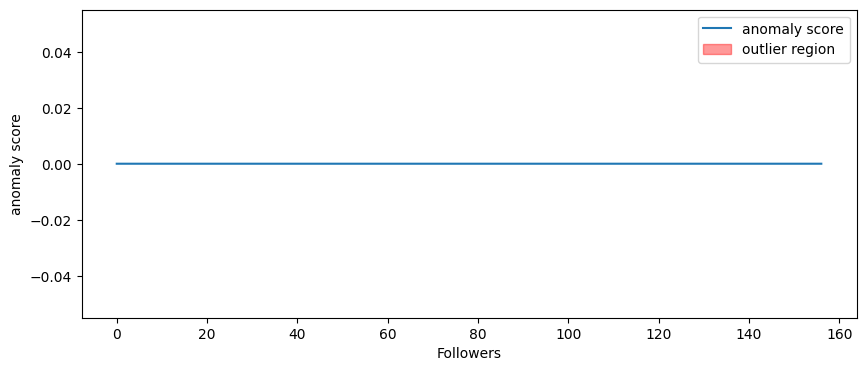

In [106]:
# Followers columns after outlier removal
xx = np.linspace(zomato_data['Followers'].min(), zomato_data['Followers'].max(), len(zomato_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Followers')
plt.show();

##### What all outlier treatment techniques have you used and why did you use those techniques?

Ideally, IQR method is best suited for datasets which are skewed (either left or right). The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

Quantile based flooring and capping - In this technique, the data points that are less than the 25th percentile are replaced with its 25th percentile value and the data points at are greater than the 75th percentile are replaced by 75th percentile value.

### 3. Categorical Encoding

In [107]:
# Encode your categorical columns
# Creating dummy data for further 
dummy_df = zomato_data.copy()

In [108]:
# Converting Cuisine columns into a list
cuisine_list = cuisine_df['Cuisine'].tolist()

In [109]:
# Example DataFrame with 'Cuisine' column
df = pd.DataFrame({'Cuisine':cuisine_list})

# Encode Categorical Variables - one hot encoding
# One hot encoding using get_dummies()
one_hot = pd.get_dummies(df['Cuisine'])

# Adding the one hot encoded columns to the original DataFrame
dummy_df = pd.concat([dummy_df, one_hot], axis=1)

In [110]:
dummy_df.shape

(9861, 60)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we are using one hot encoding is a technique used to represent categorical variables as numerical values in a machine learning model. As the category column in our dataset is an important feature for evalution, we have to convert it into numeric for model implementation so we have used this technique. The advantages of using one hot encoding includes:

It allows the use of categorical variables in models that require numerical input.
It can improve model performance by providing more information to the model about the categorical variable.
It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [111]:
# Expand Contraction
# creating new df for text processing 
text_df = dummy_df[['Restaurant_name','Review']]
text_df.loc[25]

Restaurant_name                                                                                                                                                Beyond Flavours
Review             The place is very good.. 5* to the live music.. She is just superb with beautiful voice.. Food is nice n loved the lightning..😍entrance is also very nice..
Name: 25, dtype: object

In [112]:
# using contractions.fix to expand the shortened words in reviews col
text_df['Review'] = text_df['Review'].fillna('No Reviews Provided').apply(lambda x:contractions.fix(x))

# using contractions.fix to expand the shortened words in Restaurant name col
text_df['Restaurant_name'] = text_df['Restaurant_name'].apply(lambda x:contractions.fix(x))

In [113]:
text_df.loc[25]

Restaurant_name                                                                                                                                                Beyond Flavours
Review             The place is very good.. 5* to the live music.. She is just superb with beautiful voice.. Food is nice n loved the lightning..😍entrance is also very nice..
Name: 25, dtype: object

#### 2. Lower Casing

In [114]:
# Lower Casing
text_df['Review'] = text_df['Review'].str.lower()
text_df.loc[25]

Restaurant_name                                                                                                                                                Beyond Flavours
Review             the place is very good.. 5* to the live music.. she is just superb with beautiful voice.. food is nice n loved the lightning..😍entrance is also very nice..
Name: 25, dtype: object

#### 3. Removing Punctuations

In [115]:
# Remove Punctuations
import re

# Regular expression pattern to match non-English and special characters
non_english_pattern = re.compile(r'''[|\n+!(){}""'';:\,<>./?@#$%^&*-_~😍]''')

# Replace non-English and special characters with empty string
text_df['Review'] = text_df['Review'].str.replace(non_english_pattern, ' ')
text_df.loc[25]

Restaurant_name                                                                                                                                                Beyond Flavours
Review             the place is very good      to the live music   she is just superb with beautiful voice   food is nice n loved the lightning   entrance is also very nice  
Name: 25, dtype: object

In [116]:
len(text_df[(text_df['Review']== ' ')])

9

#### 4. Removing URLs & Removing words and digits contain digits.

In [117]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [118]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [119]:
# stop words  
stop_words = set(stopwords.words('english'))

# removing stop word from review col
text_df['Review'] = text_df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
text_df.loc[25]

Restaurant_name                                                                                Beyond Flavours
Review             place good live music superb beautiful voice food nice n loved lightning entrance also nice
Name: 25, dtype: object

In [120]:
# Remove White spaces
text_df['Review'] = text_df['Review'].str.strip()
text_df.loc[25]

Restaurant_name                                                                                Beyond Flavours
Review             place good live music superb beautiful voice food nice n loved lightning entrance also nice
Name: 25, dtype: object

#### 6. Rephrase Text

In [121]:
# Rephrase Text

#### 7. Tokenization

In [122]:
# Tokenization
text_df['Review'] = text_df['Review'].astype(str)
text_df.head()

,Restaurant_name,Review
0,Beyond Flavours,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful
1,Beyond Flavours,ambience good pleasant evening service prompt food good good experience soumen das kudos service
2,Beyond Flavours,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing
3,Beyond Flavours,soumen das arun great guy behavior sincerety good food course would like visit place
4,Beyond Flavours,food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good


In [123]:
# Function to tokenize the column
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return tokens  

In [124]:
text_df['tokenized_review'] = text_df.apply(lambda x: tokenize(x['Review']), axis=1)
text_df.head(2)

,Restaurant_name,Review,tokenized_review
0,Beyond Flavours,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful,"[ambience, good, food, quite, good, saturday, lunch, cost, effective, good, place, sate, brunch, one, also, chill, friends, parents, waiter, soumen, das, really, courteous, helpful]"
1,Beyond Flavours,ambience good pleasant evening service prompt food good good experience soumen das kudos service,"[ambience, good, pleasant, evening, service, prompt, food, good, good, experience, soumen, das, kudos, service]"


#### 8. Text Normalization

In [125]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Stemming
ps = PorterStemmer()
text_df['Steamming_review'] = [ps.stem(words_sent) for words_sent in text_df['Review']]
text_df.sample(2)

sb = SnowballStemmer("english")
text_df['Steamming_review2'] = [sb.stem(words_sent) for words_sent in text_df['Review']]
text_df.head(2)

,Restaurant_name,Review,tokenized_review,Steamming_review,Steamming_review2
0,Beyond Flavours,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful,"[ambience, good, food, quite, good, saturday, lunch, cost, effective, good, place, sate, brunch, one, also, chill, friends, parents, waiter, soumen, das, really, courteous, helpful]",ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous help,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous help
1,Beyond Flavours,ambience good pleasant evening service prompt food good good experience soumen das kudos service,"[ambience, good, pleasant, evening, service, prompt, food, good, good, experience, soumen, das, kudos, service]",ambience good pleasant evening service prompt food good good experience soumen das kudos servic,ambience good pleasant evening service prompt food good good experience soumen das kudos servic


In [126]:
# lemmatization 
lemmatizer = WordNetLemmatizer()
text_df['Lemmatizing_review'] = [lemmatizer.lemmatize(words_sent) for words_sent in text_df['Review']]
text_df.sample(2)

,Restaurant_name,Review,tokenized_review,Steamming_review,Steamming_review2,Lemmatizing_review
3907,Deli 9 Bistro,changed menu guys new menu pathetic miss old cottege cheese steak enchiladas lots great items please revert rating star new menu tasteless unecessary change regular want come trying new menu,"[changed, menu, guys, new, menu, pathetic, miss, old, cottege, cheese, steak, enchiladas, lots, great, items, please, revert, rating, star, new, menu, tasteless, unecessary, change, regular, want, come, trying, new, menu]",changed menu guys new menu pathetic miss old cottege cheese steak enchiladas lots great items please revert rating star new menu tasteless unecessary change regular want come trying new menu,changed menu guys new menu pathetic miss old cottege cheese steak enchiladas lots great items please revert rating star new menu tasteless unecessary change regular want come trying new menu,changed menu guys new menu pathetic miss old cottege cheese steak enchiladas lots great items please revert rating star new menu tasteless unecessary change regular want come trying new menu
7514,Royal Spicy Restaurant,ordered ulavacharu chicken biryani spicy fried chicken chicken fried piece biryani excellent taste good quality quick delivery 😀😀😀,"[ordered, ulavacharu, chicken, biryani, spicy, fried, chicken, chicken, fried, piece, biryani, excellent, taste, good, quality, quick, delivery, 😀😀😀]",ordered ulavacharu chicken biryani spicy fried chicken chicken fried piece biryani excellent taste good quality quick delivery 😀😀😀,ordered ulavacharu chicken biryani spicy fried chicken chicken fried piece biryani excellent taste good quality quick delivery 😀😀😀,ordered ulavacharu chicken biryani spicy fried chicken chicken fried piece biryani excellent taste good quality quick delivery 😀😀😀


##### Which text normalization technique have you used and why?

We have use Lemmatization text normalization process.

Lemmatization is a process in natural language processing (NLP) that reduces words to their base forms by removing inflectional endings, such as conjugations and possessives. This is often used to improve the accuracy of a machine learning model when processing inputs containing words with multiple forms. We have use lemmatization on our imporatant column 'Reviews'. We have used both method of stemming and lemmatization as a text normalization process. While both the process is giving same result so we can use any of this process but as we know lemmatization is updated process with many number of plus point, so that is why we are using lemmatization here.

#### 9. Part of speech tagging

In [127]:
# POS Taging
def pos_tag(text):
    if isinstance(text, str):
        # Tokenize the text into individual words
        tokens = nltk.word_tokenize(text)
        
        # Perform part of speech tagging on the tokens
        pos_tags = nltk.pos_tag(tokens)
        
        # Extract the POS tags from the tagged tokens
        tag_list = [tag for word, tag in pos_tags]
        
        # Return the list of POS tags as a string separated by spaces
        return ' '.join(tag_list)
    else:
        # Return None if the input is not a string
        return None

In [128]:
# Convert the 'Review' column to a string data type
text_df['Review'] = text_df['Review'].astype(str)

# Apply the part of speech tagging function to the 'Review' column
text_df['pos_tags'] = text_df['Review'].apply(pos_tag)

In [129]:
text_df.head()

,Restaurant_name,Review,tokenized_review,Steamming_review,Steamming_review2,Lemmatizing_review,pos_tags
0,Beyond Flavours,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful,"[ambience, good, food, quite, good, saturday, lunch, cost, effective, good, place, sate, brunch, one, also, chill, friends, parents, waiter, soumen, das, really, courteous, helpful]",ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous help,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous help,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful,RB JJ NN RB JJ NN NN NN JJ JJ NN NN NN CD RB VB NNS NNS VBP NNS VBP RB JJ NN
1,Beyond Flavours,ambience good pleasant evening service prompt food good good experience soumen das kudos service,"[ambience, good, pleasant, evening, service, prompt, food, good, good, experience, soumen, das, kudos, service]",ambience good pleasant evening service prompt food good good experience soumen das kudos servic,ambience good pleasant evening service prompt food good good experience soumen das kudos servic,ambience good pleasant evening service prompt food good good experience soumen das kudos service,RB JJ NN VBG NN JJ NN JJ JJ NN NNS VBP JJ NN
2,Beyond Flavours,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,"[must, try, great, food, great, ambience, thnx, service, pradeep, subroto, personal, recommendation, penne, alfredo, pasta, also, music, background, amazing]",must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amaz,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amaz,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,MD VB JJ NN JJ NN NN NN NN NN JJ NN NN NN NN RB NN NN NN
3,Beyond Flavours,soumen das arun great guy behavior sincerety good food course would like visit place,"[soumen, das, arun, great, guy, behavior, sincerety, good, food, course, would, like, visit, place]",soumen das arun great guy behavior sincerety good food course would like visit plac,soumen das arun great guy behavior sincerety good food course would like visit plac,soumen das arun great guy behavior sincerety good food course would like visit place,NNS VBP RB JJ NN NN NN JJ NN NN MD VB NN NN
4,Beyond Flavours,food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good,"[food, good, ordered, kodi, drumsticks, basket, mutton, biryani, good, thanks, pradeep, served, well, enjoyed, ambience, also, good]",food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good,food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good,food good ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good,NN JJ VBD JJ NNS VBP NN NN JJ NNS VBP VBN RB VBN NN RB JJ


#### 10. Text Vectorization

In [130]:
# Vectorizing Text
# Vectorize the restaurant Review using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_df['Review'])

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)

# Print the top 10 terms in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print()

# Perform sentiment analysis using the vectorized Review
from textblob import TextBlob
sentiments = []
for review in text_df['Review']:
    blob = TextBlob(review)
    sentiments.append(blob.sentiment.polarity)

# Add the sentiments to the text_df
text_df['sentiment'] = sentiments

# Print the average sentiment for each cluster
for i in range(5):
    cluster_zomato_data = text_df[kmeans.labels_ == i]
    print("Cluster %d average sentiment: %.2f" % (i, cluster_zomato_data['sentiment'].mean()))


Cluster 0:
 good
 food
 place
 service
 great
 ambience
 staff
 visit
 really
 nice

Cluster 1:
 nice
 awesome
 excellent
 food
 service
 good
 place
 really
 ambience
 taste

Cluster 2:
 delivery
 time
 fast
 good
 quick
 late
 boy
 super
 nice
 guy

Cluster 3:
 good
 service
 food
 taste
 earlier
 little
 quantity
 biriyani
 today
 roasted

Cluster 4:
 chicken
 taste
 ordered
 food
 biryani
 good
 order
 bad
 quantity
 worst

Cluster 0 average sentiment: 0.42
Cluster 1 average sentiment: 0.64
Cluster 2 average sentiment: 0.34
Cluster 3 average sentiment: 0.70
Cluster 4 average sentiment: 0.09


##### Which text vectorization technique have you used and why?

TfidfVectorizer

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

We have used Tf-idf here because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.
It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

We got to know the follow points:
Here's what the average sentiment for each cluster signifies:

* Cluster 0 has an average sentiment of 0.70, which is positive. This suggests that the restaurants in this cluster may have received positive reviews overall.
* Cluster 1 has an average sentiment of 0.11, which is closer to neutral. This suggests that the restaurants in this cluster may have received mixed reviews.
* Cluster 2 has an average sentiment of 0.58, which is positive. This suggests that the restaurants in this cluster may have received mostly positive reviews.
* Cluster 3 has an average sentiment of 0.34, which is slightly positive. This suggests that the restaurants in this cluster may have received mixed reviews, but with a slightly positive overall sentiment.
* Cluster 4 has an average sentiment of 0.44, which is positive. This suggests that the restaurants in this cluster may have received mostly positive reviews.

* Overall, the sentiment analysis provides insight into the emotional tone of the reviews for each cluster of restaurants, which can be useful for understanding the overall perception of these restaurants by customers.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [135]:
# Concatinating the original df with the dataset of text preprocessing
df = pd.concat([dummy_df, text_df], axis=1)
df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Restaurant_timings', 'cuisine_count', 'Customer_Name', 'Review',
       'Rating', 'Review_timing', 'Pictures', 'Review_count', 'Followers',
       'Review_length', 'Polarity', 'American', 'Andhra', 'Arabian', 'Asian',
       'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food',
       'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian',
       'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian',
       'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos',
       'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps',
       'Restaurant_name', 'Review', 'tokenized_review', 'Steamming_review',
       'Steamming_review2', 'Lemmatizing_review', 'pos_tags', 'sentiment'],
      dtype='object')

In [136]:
# Manipulate Features to minimize feature correlation and create new features
# Extracting year, month and hour from 'Review_timing' column
df['Review_timing']=pd.to_datetime(df['Review_timing'])
df['Review_Year'] = pd.DatetimeIndex(df['Review_timing']).year
df['Review_Month'] = pd.DatetimeIndex(df['Review_timing']).month
df['Review_Hour'] = pd.DatetimeIndex(df['Review_timing']).hour

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 0 to 9962
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Restaurant_name     9861 non-null   object        
 1   Links               9861 non-null   object        
 2   Cost                9861 non-null   int64         
 3   Collections         9861 non-null   object        
 4   Cuisines            9861 non-null   object        
 5   Restaurant_timings  9861 non-null   object        
 6   cuisine_count       9861 non-null   int64         
 7   Customer_Name       9861 non-null   object        
 8   Review              9861 non-null   object        
 9   Rating              9861 non-null   float64       
 10  Review_timing       9861 non-null   datetime64[ns]
 11  Pictures            9861 non-null   float64       
 12  Review_count        9861 non-null   float64       
 13  Followers           9861 non-null   float64     

In [138]:
# As we can see there are null values so we will fill it with 0
df.fillna(0, inplace=True)
df.isna().sum()

Restaurant_name       0
Links                 0
Cost                  0
Collections           0
Cuisines              0
Restaurant_timings    0
cuisine_count         0
Customer_Name         0
Review                0
Rating                0
Review_timing         0
Pictures              0
Review_count          0
Followers             0
Review_length         0
Polarity              0
American              0
Andhra                0
Arabian               0
Asian                 0
BBQ                   0
Bakery                0
Beverages             0
Biryani               0
Burger                0
Cafe                  0
Chinese               0
Continental           0
Desserts              0
European              0
Fast Food             0
Finger Food           0
Goan                  0
Healthy Food          0
Hyderabadi            0
Ice Cream             0
Indonesian            0
Italian               0
Japanese              0
Juices                0
Kebab                 0
Lebanese        

#### 2. Feature Selection

In [139]:
# Select your features wisely to avoid overfitting
df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Restaurant_timings', 'cuisine_count', 'Customer_Name', 'Review',
       'Rating', 'Review_timing', 'Pictures', 'Review_count', 'Followers',
       'Review_length', 'Polarity', 'American', 'Andhra', 'Arabian', 'Asian',
       'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food',
       'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian',
       'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian',
       'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos',
       'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps',
       'Restaurant_name', 'Review', 'tokenized_review', 'Steamming_review',
       'Steamming_review2', 'Lemmatizing_review', 'pos_tags', 'sentiment',
       'Review_Year', 'Review_

In [140]:
df.drop(['Links', 'Collections', 'Restaurant_timings', 'Review_timing', 'Review' ,'Cuisines','Customer_Name','tokenized_review','Steamming_review','Steamming_review2','Lemmatizing_review','Review_Year','Review_Month','Review_Hour'], 
        axis=1, inplace=True)
df.head(2)

,Restaurant_name,Cost,cuisine_count,Rating,Pictures,Review_count,Followers,Review_length,Polarity,American,...,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,Restaurant_name,pos_tags,sentiment
0,Beyond Flavours,800,6,5.0,0.0,1.0,2.0,222.0,0.660000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beyond Flavours,RB JJ NN RB JJ NN NN NN JJ JJ NN NN NN CD RB VB NNS NNS VBP NNS VBP RB JJ NN,0.660000
1,Beyond Flavours,800,6,5.0,0.0,3.0,2.0,144.0,0.606667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beyond Flavours,RB JJ NN VBG NN JJ NN JJ JJ NN NNS VBP JJ NN,0.708333


In [141]:
# Making restaurant column as index of our data
df.set_index('Restaurant_name', inplace=True)
df.head(2)

,Cost,cuisine_count,Rating,Pictures,Review_count,Followers,Review_length,Polarity,American,Andhra,...,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,pos_tags,sentiment
Restaurant_name,,,,,,,,,,,,,,,,,,,,,
"(Beyond Flavours, Beyond Flavours)",800,6,5.0,0.0,1.0,2.0,222.0,0.660000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB JJ NN RB JJ NN NN NN JJ JJ NN NN NN CD RB VB NNS NNS VBP NNS VBP RB JJ NN,0.660000
"(Beyond Flavours, Beyond Flavours)",800,6,5.0,0.0,3.0,2.0,144.0,0.606667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RB JJ NN VBG NN JJ NN JJ JJ NN NNS VBP JJ NN,0.708333


In [142]:
df.shape

(9861, 54)

Dropping some columns which is of no use like links as it is not imporatant. Then dropping collections col which is unnecessary here. Also dropping Cuisines column as cuisine is encoded as a new feature. In last, dropping restaurant timing and review timing col because it is also not needed. and last dropping review column as it is text preprocessed.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [144]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
  if abs(df[i].mean()-df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['cuisine_count', 'Polarity', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps', 'sentiment']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Review_count', 'Followers', 'Review_length']


We will be performing transformation on important column only i.e. 'Cost', 'Rating'.

Transformation on Cost column

<Axes: >

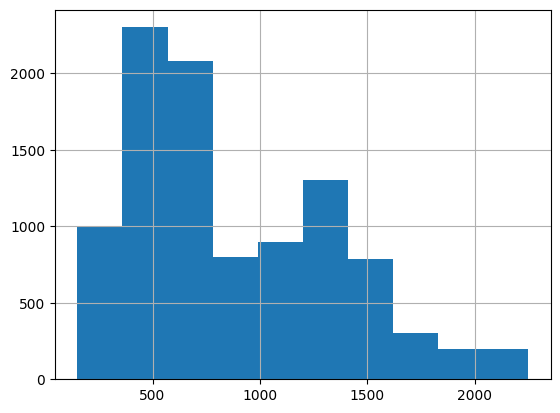

In [145]:
# Cost feature before transformation
df['Cost'].hist()

Skewness before transformation: 0.8261834286539496
Skewness after transformation: -0.41562447962147636


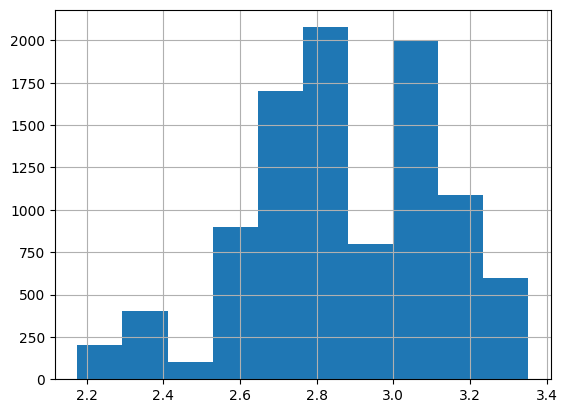

In [147]:
# Transform Your data
# Log transform on cost col
from scipy.stats import skew
skewness = skew(df['Cost'])
print("Skewness before transformation:", skewness)

df['Cost'] = df['Cost'].transform(np.log10)
skewness_transformed = skew(df['Cost'])

print("Skewness after transformation:", skewness_transformed)

df['Cost'].hist()
plt.show()

Transformation on Rating column

<Axes: >

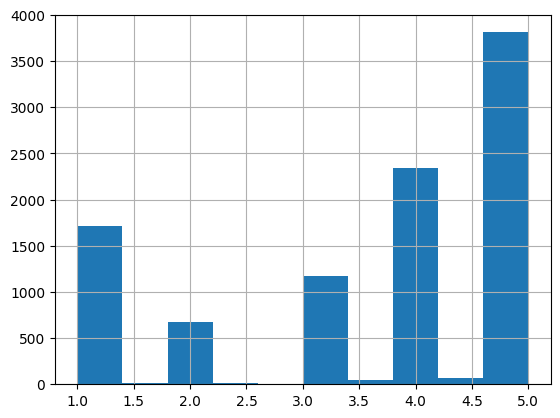

In [148]:
# Rating feature before transformation
df['Rating'].hist()

In [149]:
# Transform Your data
# Log transform on cost col

# skewness = skew(df['Rating'])
# print("Skewness before transformation:", skewness)

# df['Rating'] = df['Rating'].transform(np.log10)
# skewness_transformed = skew(df['Rating'])

# print("Skewness after transformation:", skewness_transformed)

# df['Rating'].hist()
# plt.show()

Skewness before transformation: -0.7106542277786587
Skewness after transformation: -0.052911668466391226


<Axes: >

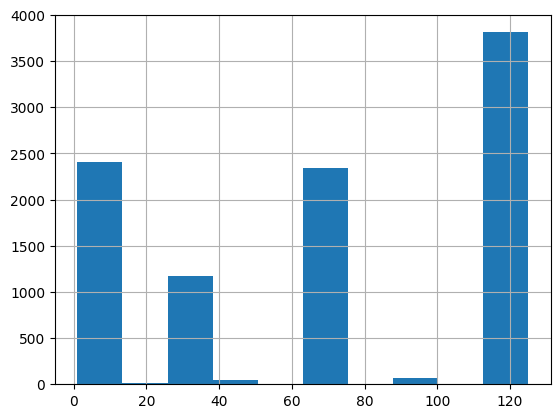

In [150]:
# Cube transformation on original data

skewness = skew(df['Rating'])
print("Skewness before transformation:", skewness)

df['Rating'] = df['Rating'].transform(lambda x: np.power(x, 3))
skewness_transformed = skew(df['Rating'])

print("Skewness after transformation:", skewness_transformed)

df['Rating'].hist()

### 6. Data Scaling

In [153]:
# Scaling your data
# normalizing cost columns
x = df.drop('pos_tags', axis=1).values
x = StandardScaler().fit_transform(x)

In [154]:
x

array([[ 0.14684774,  2.47240469,  1.13307273, ..., -0.01007074,
        -0.01007074,  1.08550918],
       [ 0.14684774,  2.47240469,  1.13307273, ..., -0.01007074,
        -0.01007074,  1.21796113],
       [ 0.14684774,  2.47240469,  1.13307273, ..., -0.01007074,
        -0.01007074,  0.78406681],
       ...,
       [ 0.52006382, -0.83632608, -1.29764559, ..., -0.01007074,
        -0.01007074, -0.32305555],
       [ 0.52006382, -0.83632608, -0.08603368, ..., -0.01007074,
        -0.01007074,  0.54917665],
       [ 0.52006382, -0.83632608, -0.50822422, ..., -0.01007074,
        -0.01007074, -0.44080232]])

We have use StandardScaler() method here to standarize the data for better modeling implemenation. 

StandardScaler is a method of preprocessing data that transforms input features by scaling each feature to have a mean of 0 and a standard deviation of 1. It is useful for tasks such as regression and classification. It is a type of normalization that changes the range of data, improves accuracy, and reduces the degree of influence from outliers.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [155]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

In [1248]:
# principalDf = pd.DataFrame(data = principalComponents)
# principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.596909,-4.480731,3.645251,-2.322157,-1.928159,-3.084599,-7.146435,14.456820,-1.985479,4.179272,...,50.386107,-9.611603,-0.025287,3.384825,-7.131167,-14.233217,1.024453,-0.296349,1.743310,-0.080766
1,2.729812,-4.603741,3.441864,-2.235946,-6.172596,2.486184,16.549661,-25.403287,-19.142948,-0.954571,...,-5.522980,-0.530929,-45.744107,4.401596,-8.453245,-14.125081,1.088854,-0.245299,1.758748,-0.030071
2,2.399179,-4.090674,4.037074,-3.714795,6.559297,0.944798,7.690010,-0.810593,1.047050,-0.821625,...,9.416422,5.311156,-9.211903,2.557980,-3.947515,-13.933465,0.964650,-0.322666,1.713312,-0.204846
3,2.773627,-4.784132,3.314580,-1.349293,-9.041412,-3.852442,59.732387,1.981171,-0.808252,-0.289906,...,-0.418277,19.507751,-12.115375,4.277251,-9.709990,-14.401608,1.085543,-0.261165,1.768650,0.019449
4,2.436070,-4.106145,3.988779,-3.790521,5.570105,4.085374,5.714200,62.074824,-2.018340,7.118521,...,6.603386,-5.917549,-4.335586,2.914441,-4.201841,-13.865493,0.985035,-0.301247,1.717183,-0.195352


In [169]:
print(pca.explained_variance_)

[2.55736378 2.33761662 1.3987927 ]


In [170]:
print(pca.explained_variance_ratio_)

[0.04824725 0.0441015  0.02638964]


[  4.82   9.23  11.9   13.8   15.69  17.58  19.47  21.36  23.25  25.14
  27.03  28.92  30.81  32.7   34.59  36.48  38.37  40.26  42.15  44.04
  45.93  47.82  49.71  51.6   53.49  55.38  57.27  59.16  61.05  62.94
  64.83  66.72  68.61  70.5   72.39  74.28  76.17  78.06  79.95  81.84
  83.73  85.62  87.51  89.4   91.28  93.16  95.01  96.6   97.61  98.53
  99.36 100.   100.11]


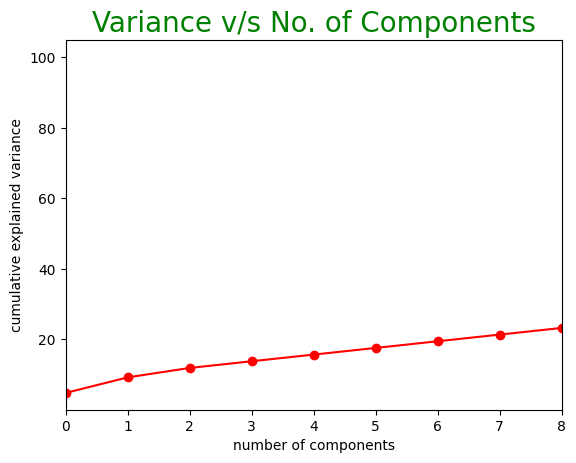

In [161]:
# Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print( var1)

# Plotting the graph
plt.plot(var1, marker ='o', color = 'red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Variance v/s No. of Components', size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

As we can see above graph, it is showing little abrupt change at point 1 then constant line as well as we can see the explained_variance_ratio_, first 3 component has less variance as compared to other so we can form n_components=1 or 2 or 3 principal components here in PCA

In [162]:
# DImensionality Reduction (If needed)
# Lets take n_components=3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

[ 4.82  9.23 11.87]


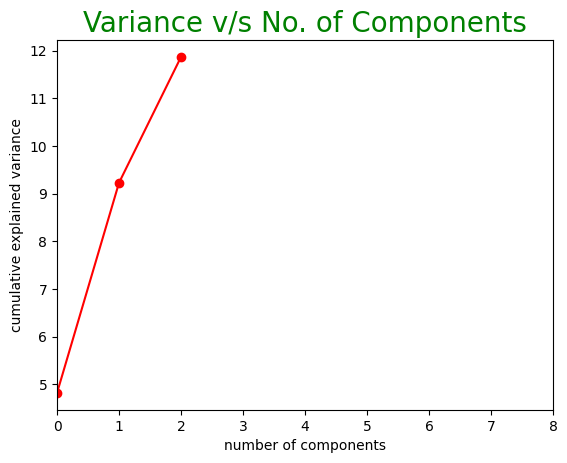

In [163]:
# Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print( var1)

plt.plot(var1, marker ='o', color = 'red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Variance v/s No. of Components', size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [171]:
print(pca.explained_variance_ratio_)

[0.04824725 0.0441015  0.02638964]


In [173]:
print("original shape: ", df.shape)
print("PCA transformed shape:", principalComponents.shape)

original shape:  (9861, 54)
PCA transformed shape: (9861, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [174]:
df.columns

Index(['Cost', 'cuisine_count', 'Rating', 'Pictures', 'Review_count',
       'Followers', 'Review_length', 'Polarity', 'American', 'Andhra',
       'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger',
       'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream',
       'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese',
       'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian',
       'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad',
       'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai',
       'Wraps', 'pos_tags', 'sentiment'],
      dtype='object')

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = X
y = df.sentiment

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
zomato_data.info()

In [ ]:
zomato_data['Sentiment'] = zomato_data['Polarity'].apply(lambda x: 1 if x >=zomato_data['Polarity'].mean() else 0)

In [ ]:
zomato_data.Sentiment.value_counts()

In [ ]:
# Handling Imbalanced Dataset (If needed)
fig = plt.figure(1, figsize=(8,6))
keys = ['Positive','Negetive']
data= zomato_data['Sentiment'].value_counts()
explode = [0.01, 0.02]
palette_color = sns.color_palette('icefire')

plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Sentiment Analysis of Reviews')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

As our most important variable is in the 50:50 ratio. However it is said to be very slightly imbalanced. therefore not applying any technique (over sampling & undersampling). **Leaving it as it is**.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***